Exploratory Data Analysis on Bank Loan Approval

Importing Essential Libraries

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

Ignore warnings

In [2]:
warnings.filterwarnings('ignore')

Reading Datasets

In [3]:
app_data = pd.read_csv('application_data.csv')

In [4]:
app_data.shape

(307511, 122)

In [5]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

Data Cleaning

app_data Dataset has many columns which are of no use for our analysis like columns related to user locations hence we will drop those columns

In [6]:
app_data.drop(app_data.loc[:, "APARTMENTS_AVG":"EMERGENCYSTATE_MODE"], axis=1, inplace=True)

Dropping some more columns which I feel as duplicate information so need not to maintain

In [8]:
app_data.drop(app_data.loc[:, 'REGION_RATING_CLIENT_W_CITY':'LIVE_REGION_NOT_WORK_REGION'], inplace=True, axis=1)
app_data.drop(app_data.loc[:, 'AMT_REQ_CREDIT_BUREAU_HOUR':'AMT_REQ_CREDIT_BUREAU_YEAR'], inplace=True, axis=1)

In [9]:
app_data.shape

(307511, 63)

Thus we are now left with 63 columns

Now we will check information like, data type of columns, non-null values count in each column

In [10]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

We see there are missing values in the columns, we'll check percentage of missing values by each columns

In [11]:
(app_data.iloc[:, :37].isnull().sum()/app_data.shape[0])*100.0

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
OWN_CAR_AGE                   65.990810
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000


In [12]:
(app_data.iloc[:, 38:].isnull().sum()/app_data.shape[0])*100.0

OBS_30_CNT_SOCIAL_CIRCLE    0.332021
DEF_30_CNT_SOCIAL_CIRCLE    0.332021
OBS_60_CNT_SOCIAL_CIRCLE    0.332021
DEF_60_CNT_SOCIAL_CIRCLE    0.332021
DAYS_LAST_PHONE_CHANGE      0.000325
FLAG_DOCUMENT_2             0.000000
FLAG_DOCUMENT_3             0.000000
FLAG_DOCUMENT_4             0.000000
FLAG_DOCUMENT_5             0.000000
FLAG_DOCUMENT_6             0.000000
FLAG_DOCUMENT_7             0.000000
FLAG_DOCUMENT_8             0.000000
FLAG_DOCUMENT_9             0.000000
FLAG_DOCUMENT_10            0.000000
FLAG_DOCUMENT_11            0.000000
FLAG_DOCUMENT_12            0.000000
FLAG_DOCUMENT_13            0.000000
FLAG_DOCUMENT_14            0.000000
FLAG_DOCUMENT_15            0.000000
FLAG_DOCUMENT_16            0.000000
FLAG_DOCUMENT_17            0.000000
FLAG_DOCUMENT_18            0.000000
FLAG_DOCUMENT_19            0.000000
FLAG_DOCUMENT_20            0.000000
FLAG_DOCUMENT_21            0.000000
dtype: float64

Here we have one column named "OWN_CAR_AGE" with around 65% of missing values. Since we already have a column "FLAG_OWN_CAR" which indicates if customer has Car or not which is enough for our analysis on this parameter. Also considering high percentage of missing values we will go and drop this column. 

In [13]:
app_data.drop('OWN_CAR_AGE', axis=1,inplace=True)

Other all columns we have contain missing values less than 40%. We can safely impute them with mean, median or mode depending on type of columns.

We will impute categorical columns with Mode. And we will impute numerical columns with either mean or median depending on its skewness.

### For Numerical column having missing values

- Fill with mean: When the data is having a Normal distribution.

- Fill with median: When the data is not having a Normal distribution.

If Skewness value of any column data is between:

-0.5 and 0.5, the distribution of the value is almost symmetrical

-1 and -0.5, the data is negatively skewed, and if it is between 0.5 to 1, the data is positively skewed. The skewness is moderate.

If the skewness is lower than -1 (negatively skewed) or greater than 1 (positively skewed), the data is highly skewed.

Amount Annuity Skweness: 1.58


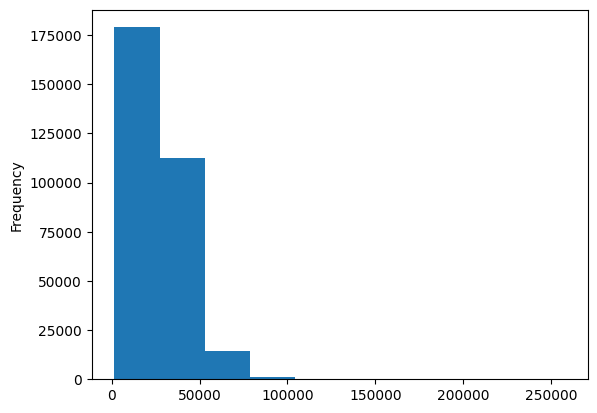

In [14]:
print("Amount Annuity Skweness:", np.round(app_data.AMT_ANNUITY.skew(), 2))
app_data.AMT_ANNUITY.plot.hist()
plt.show()

Here we have got skewness value as 1.58 which is greater than 1. Also as evident from this histogram plot AMT_ANNUITY column is highly skewed. So here we will use median to impute missing values.

In [15]:
app_data.AMT_ANNUITY.fillna(app_data.AMT_ANNUITY.median(), inplace=True)

Similarly checking Skewness of data in other numerical columns

In [16]:
print("Amount Good's price Skweness:", np.round(app_data.AMT_GOODS_PRICE.skew(), 2))
print("Family members count Skweness:", np.round(app_data.CNT_FAM_MEMBERS.skew(), 2))
print("Credit score source 2 Skweness:", np.round(app_data.EXT_SOURCE_2.skew(), 2))
print("Credit score source 3 Skweness:", np.round(app_data.EXT_SOURCE_3.skew(), 2))
print("OBS_30_CNT_SOCIAL_CIRCLE Skweness:", np.round(app_data.OBS_30_CNT_SOCIAL_CIRCLE.skew(), 2))
print("DEF_30_CNT_SOCIAL_CIRCLE Skweness:", np.round(app_data.DEF_30_CNT_SOCIAL_CIRCLE.skew(), 2))
print("OBS_60_CNT_SOCIAL_CIRCLE Skweness:", np.round(app_data.OBS_60_CNT_SOCIAL_CIRCLE.skew(), 2))
print("DEF_60_CNT_SOCIAL_CIRCLE Skweness:", np.round(app_data.DEF_60_CNT_SOCIAL_CIRCLE.skew(), 2))
print("DAYS_LAST_PHONE_CHANGE Skweness:", np.round(app_data.DAYS_LAST_PHONE_CHANGE.skew(), 2))

Amount Good's price Skweness: 1.35
Family members count Skweness: 0.99
Credit score source 2 Skweness: -0.79
Credit score source 3 Skweness: -0.41
OBS_30_CNT_SOCIAL_CIRCLE Skweness: 12.14
DEF_30_CNT_SOCIAL_CIRCLE Skweness: 5.18
OBS_60_CNT_SOCIAL_CIRCLE Skweness: 12.07
DEF_60_CNT_SOCIAL_CIRCLE Skweness: 5.28
DAYS_LAST_PHONE_CHANGE Skweness: -0.71


For columns with skewness -1 to -0.5 or 0.5 to 2 we will replace missing values with median. As we can manage some skewness till 2 with median also.

In [17]:
app_data.AMT_GOODS_PRICE.fillna(app_data.AMT_GOODS_PRICE.median(), inplace=True)
app_data.CNT_FAM_MEMBERS.fillna(app_data.CNT_FAM_MEMBERS.median(), inplace=True)
app_data.EXT_SOURCE_2.fillna(app_data.EXT_SOURCE_2.median(), inplace=True)
app_data.DAYS_LAST_PHONE_CHANGE.fillna(app_data.DAYS_LAST_PHONE_CHANGE.median(), inplace=True)

We can replace "EXT_SOURCE_3" with mean

In [18]:
app_data.EXT_SOURCE_3.fillna(app_data.EXT_SOURCE_3.mean(), inplace=True)

In case of "EXT_SOURCE_1" this column has high number of missing values so we will not impute but fill missing with NAN values so it doesn't interfere in stats as it will help us in later analysis

In [19]:
app_data.EXT_SOURCE_1.fillna(np.NAN, inplace = True)

Rest Numerical columns have very high Skewness so we will do analysis based on quantiles for them later

In [20]:
app_data.OBS_30_CNT_SOCIAL_CIRCLE.quantile([0.99, 1])

0.99     10.0
1.00    348.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

As evident from above there is high difference between 100th percentile and 99th percentile of OBS_30_CNT_SOCIAL_CIRCLE. So imputing would not be good option in these types of columns

<b>Imputation of Catagorical columns</b>

"OCCUPATION_TYPE" column has around 31 % missing values we will categorize them into Unknown Category

In [21]:
app_data.OCCUPATION_TYPE[app_data.OCCUPATION_TYPE.isnull()] = 'Unknown'

In [22]:
app_data.OCCUPATION_TYPE.value_counts(normalize=True)

OCCUPATION_TYPE
Unknown                  0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: proportion, dtype: float64

"NAME_TYPE_SUITE" is a catagorical columns with just 0.4% missing values which can be replaced by mode

In [23]:
app_data.NAME_TYPE_SUITE.fillna(app_data.NAME_TYPE_SUITE.mode()[0], inplace=True)

In [24]:
app_data.CNT_FAM_MEMBERS = app_data.CNT_FAM_MEMBERS.astype('int')

Checking "CODE_GENDER" values

In [25]:
app_data.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

We find some XNA values. Maybe they didn't prefer to mention their gender so we will keep it as it is.

There are 20 columns about if customer has submitted a particular document or not. We will merge them all into one column to find out total number of documents submitted by customer.

In [26]:
document = [x for x in app_data.columns if 'DOCUMENT' in x]
app_data['Total_Documents'] = app_data['FLAG_DOCUMENT_2']

In [27]:
for x in document[1:]:
    app_data['Total_Documents'] += app_data[x]

Now we will drop all document columns as we have stored sum of documents into a single column name Total_Documents

In [28]:
app_data.drop([x for x in document], axis=1, inplace=True)

There are some values in ORGANIZATION_TYPE column with values "XNA" we will categorize them into Unknown category.

In [29]:
app_data.ORGANIZATION_TYPE  = app_data.ORGANIZATION_TYPE.replace('XNA', 'Unknown')

There are two values with category "Unknown" in NAME_FAMILY_STATUS column we will replace it with mode

In [30]:
app_data.NAME_FAMILY_STATUS.value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

In [31]:
# As evident from above most commonly occuring value is "Married so we will directly replace with it"
app_data.NAME_FAMILY_STATUS = app_data.NAME_FAMILY_STATUS.replace('Unknown', "Married")

There are four columns DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH with values as number of days. But these contain negative values. Maybe it was the code for storing data. For our analysis purpose we will convert DAYS_BIRTH, DAYS_EMPLOYED column values into years and round up its values to two digits. And also rename the columns. For DAYS_REGISTRATION, DAYS_ID_PUBLISH we will just convert negative into absolute values.

In [7]:
app_data.rename(columns={"DAYS_BIRTH":"Age", "DAYS_EMPLOYED":"Work_Experience"}, inplace=True)

In [8]:
app_data.Age = app_data.Age.apply(lambda x : (np.abs(x)/365.25).astype('int'))
app_data.Work_Experience = app_data.Work_Experience.apply(lambda x: np.round(np.abs(x)/365.25, 2))
app_data.DAYS_REGISTRATION = app_data.DAYS_REGISTRATION.apply(lambda x : np.abs(x))
app_data.DAYS_ID_PUBLISH = app_data.DAYS_ID_PUBLISH.apply(lambda x : np.abs(x))

We will compute average of all the 3 Credit score columns and convert them into one single column. For first credit score columns some values were missing we will make sure average for those candidates would be calculated considering only rest two columns.

In [9]:
app_data['avg_credit_sc'] = app_data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)

In [10]:
#We will drop these columns as there is no need of them now.
app_data.drop(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'], axis=1, inplace=True)

In [11]:
#Converting Credit scores into 3 digits for better analysis
app_data.avg_credit_sc = np.round(app_data.avg_credit_sc*1000, 2)

Work Experience column has much outlier values, some are even not possible like 999.8 or candidate with age 40 having 42 years of Work Experience. So to ensure we have correct values we will clean the column accordingly. In India generally people start working after minumum of age of 18. So say if canditate is aged 40 his Work experience could not be more than 40-18 i.e 22. So we will apply the same to Work Experience column.

In [12]:
app_data['Work_Experience'] = app_data.apply(lambda x : (x['Age'] - 18) if 
               x['Work_Experience'] > (x['Age'] - 18) else x['Work_Experience'], axis=1)

In [13]:
#Changing negative values in DAYS_LAST_PHONE_CHANGE to positive
app_data.DAYS_LAST_PHONE_CHANGE = np.abs(app_data.DAYS_LAST_PHONE_CHANGE)

In [14]:
app_data.CNT_FAM_MEMBERS = pd.cut(x = app_data.CNT_FAM_MEMBERS, bins=[0,4,100], labels=['Less than 4 Low', 'More than 4 High'])

With This we come to an end of Data Cleaning part

<b>UNIVARIATE ANALYSIS</b>

Analysing target column. Here 0 means no payment difficulties and 1 means person with payment difficulties.

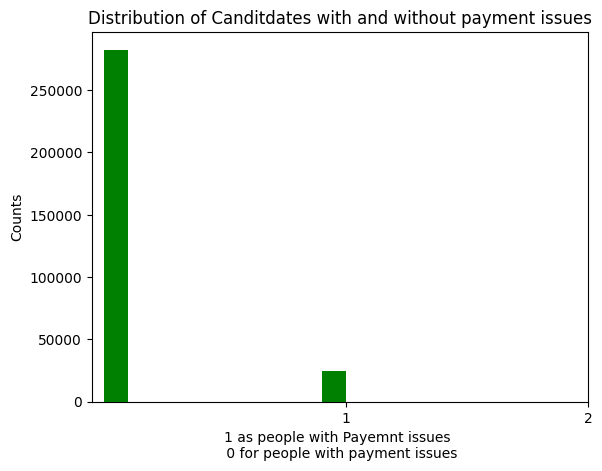

In [20]:
plt.hist(app_data.TARGET, color='Green')
plt.xticks([1,2])
plt.title('Distribution of Canditdates with and without payment issues')
plt.xlabel('1 as people with Payemnt issues \n 0 for people with payment issues')
plt.ylabel('Counts')
plt.show()

In [21]:
#Calculating percentages of 0 and 1
app_data.TARGET.value_counts(normalize=True)

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

In [22]:
#Calculating Ratio Target Variable
app_data.TARGET.value_counts()[0]/app_data.TARGET.value_counts()[1]


11.387150050352467

<b>Inferences Drawn</b>

1) Most of the customers didn't have difficulties in payments.
2) 1 out of 11 customer had difficulties in payment

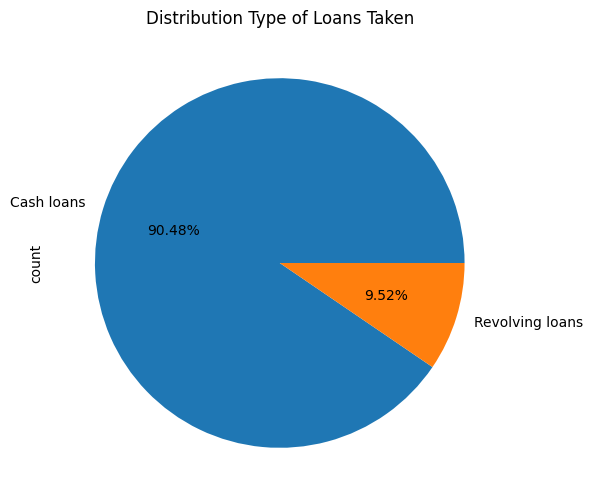

In [23]:
figure = plt.figure(figsize=[6,6])
plt.title('Distribution Type of Loans Taken')
app_data.NAME_CONTRACT_TYPE.value_counts().plot.pie(autopct=r'%1.2f%%')
plt.show()

Most of candidates preferred taking Cash Loans over Revolving Loans.

From here we will dicvide our dataset into two parts with respect to target variable for separate analysis

In [24]:
target_0 = app_data[app_data.TARGET == 0]
target_1 = app_data[app_data.TARGET == 1]

Analysing CODE_GENDER column

In [25]:
target_0.CODE_GENDER.value_counts()

CODE_GENDER
F      188278
M       94404
XNA         4
Name: count, dtype: int64

In [26]:
target_1.CODE_GENDER.value_counts()

CODE_GENDER
F    14170
M    10655
Name: count, dtype: int64

In [27]:
#Percentage of Males and Females having no difficulties in payments
print("Females", target_0.CODE_GENDER.value_counts()[0]/app_data.CODE_GENDER.shape[0])
print("Males", target_0.CODE_GENDER.value_counts()[1]/app_data.CODE_GENDER.shape[0])

Females 0.6122642767250602
Males 0.30699389615330835


In [28]:
print("Females", target_1.CODE_GENDER.value_counts()[0]/app_data.CODE_GENDER.shape[0])
print("Males", target_1.CODE_GENDER.value_counts()[1]/app_data.CODE_GENDER.shape[0])

Females 0.04607965243519744
Males 0.03464916702166752


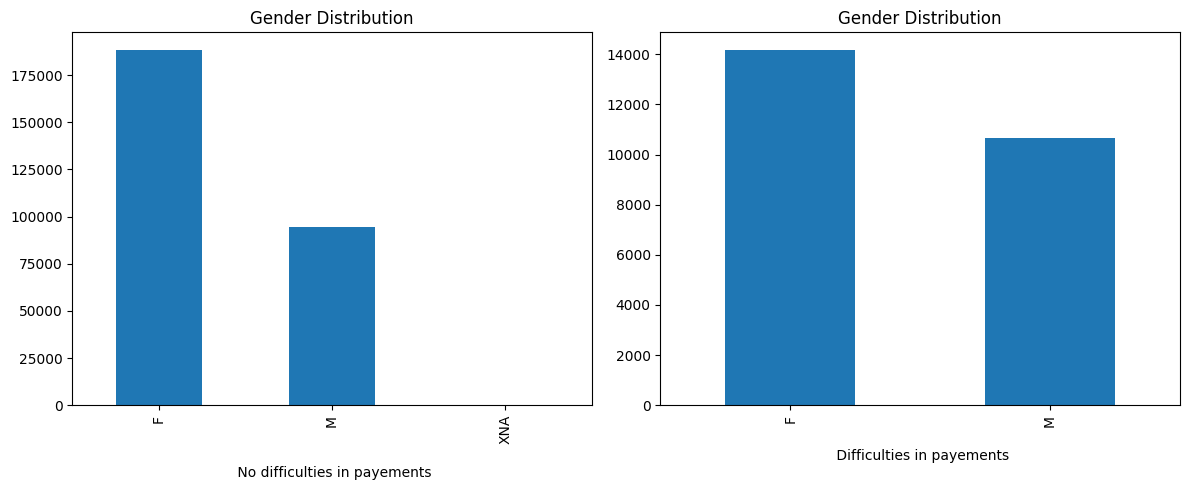

In [29]:
figure = plt.figure(figsize=[12, 5])
plt.subplot(1,2,1)
target_0.CODE_GENDER.value_counts().plot.bar()
plt.xlabel('\n No difficulties in payements')
plt.title('Gender Distribution')
plt.subplot(1,2,2)
target_1.CODE_GENDER.value_counts().plot.bar()
plt.xlabel('\n Difficulties in payements')
plt.tight_layout()
plt.title('Gender Distribution')
plt.show()

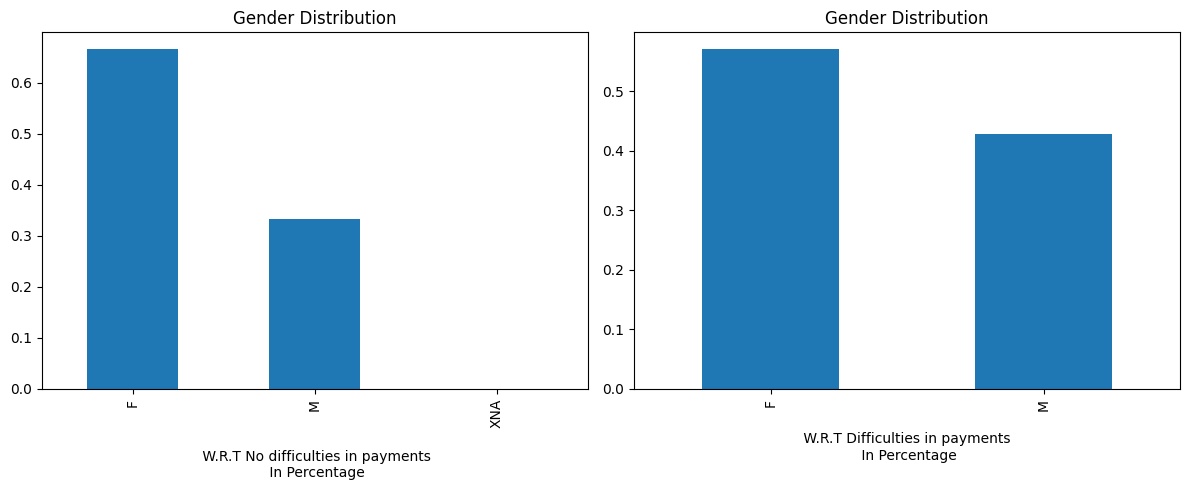

In [50]:
figure = plt.figure(figsize=[12, 5])
plt.subplot(1,2,1)
target_0.CODE_GENDER.value_counts(normalize=True).plot.bar()
plt.xlabel('\n W.R.T No difficulties in payments\n In Percentage')
plt.title('Gender Distribution')
plt.subplot(1,2,2)
target_1.CODE_GENDER.value_counts(normalize=True).plot.bar()
plt.xlabel('\n W.R.T Difficulties in payments \n In Percentage')
plt.tight_layout()
plt.title('Gender Distribution')
plt.show()

-Inferences:

1) There are high percentage of females compared to males in this applying for loan.

2) Female category tends to have a slightly more percentage of canditates with payment issues compared to Male category. 

Analysing NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_TYPE_SUITE, ORGANIZATION_TYPE, OCCUPATION_TYPE

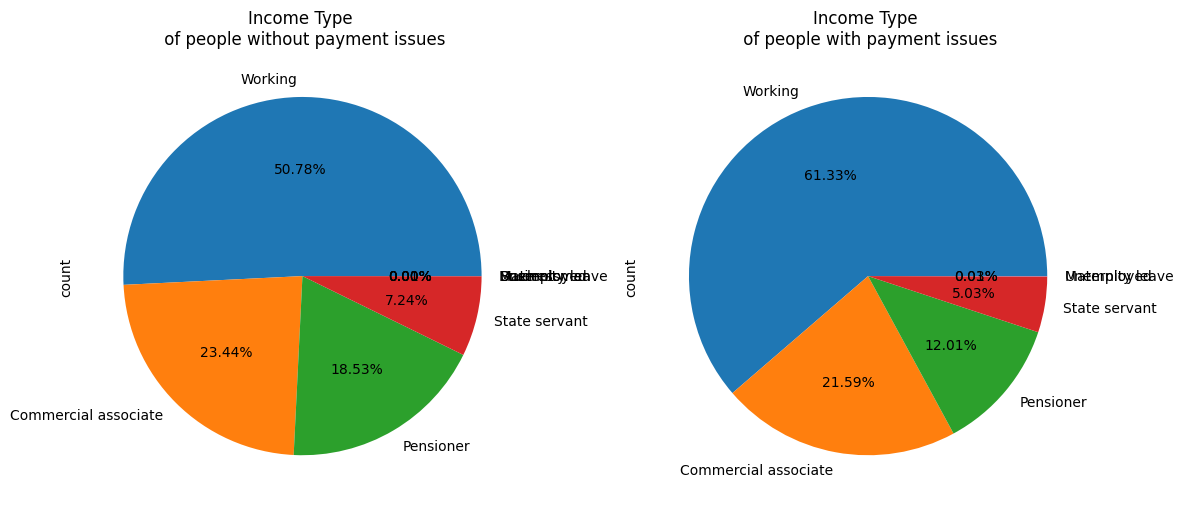

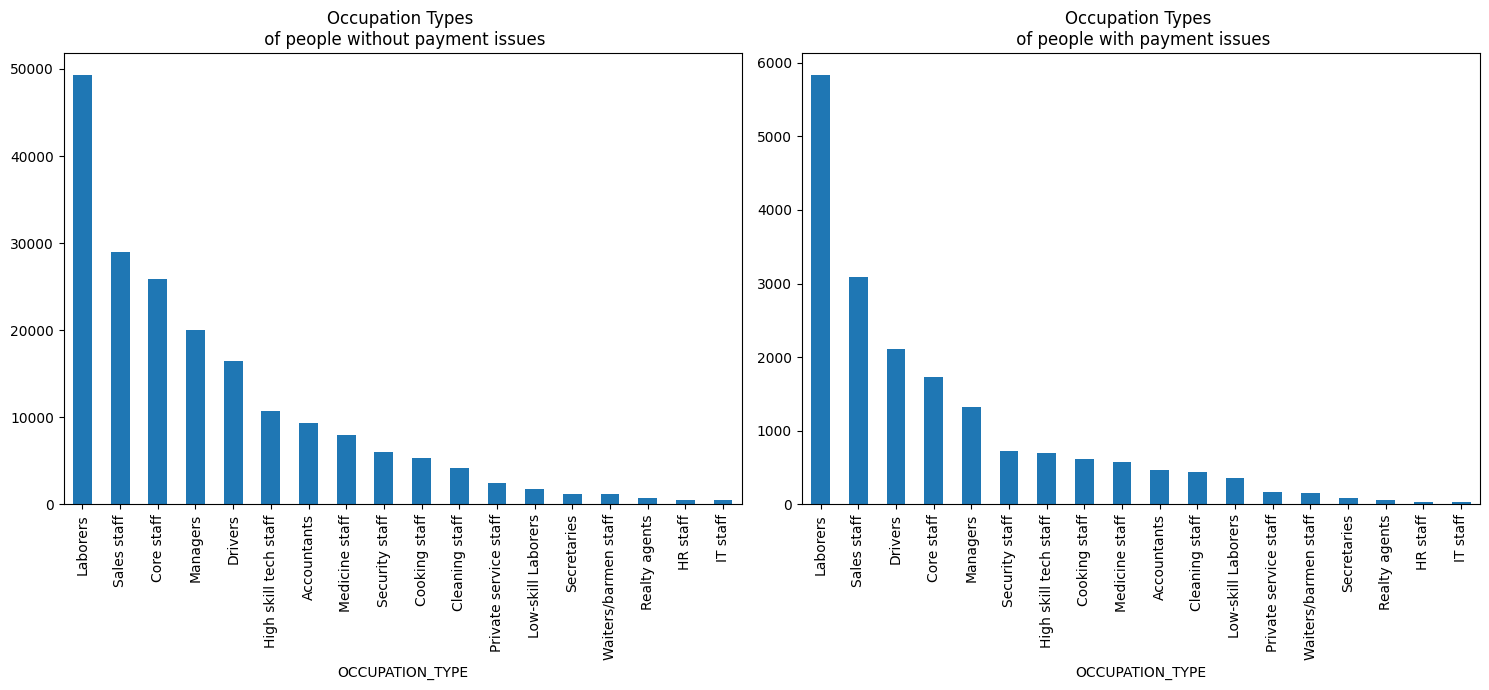

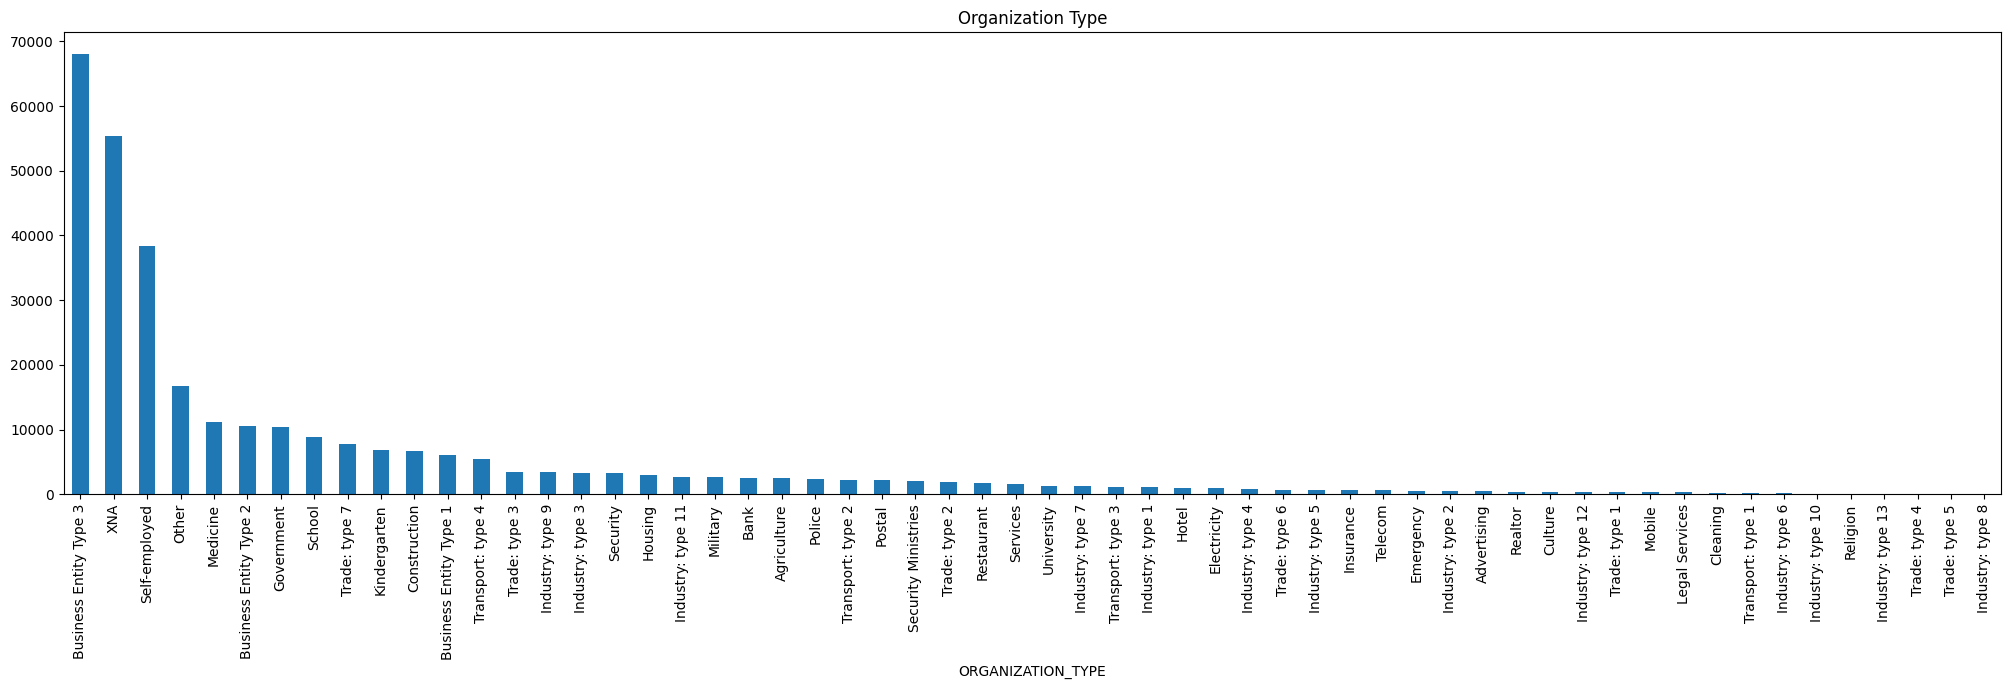

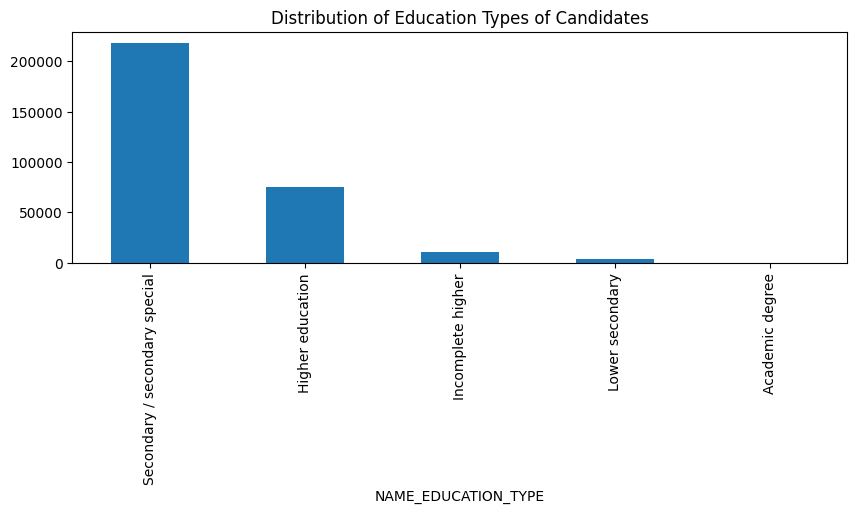

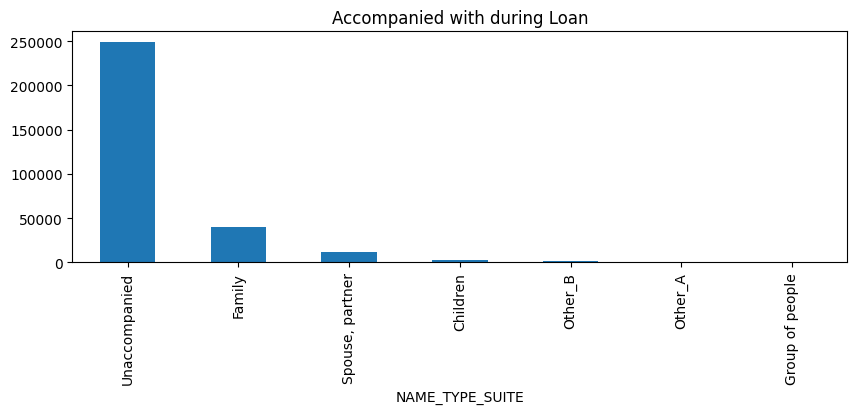

In [35]:
#NAME_INCOME_TYPE
figure = plt.figure(figsize=[12,12])
plt.subplot(1,2,1)
#print(target_0.NAME_INCOME_TYPE.value_counts(normalize=True))
target_0.NAME_INCOME_TYPE.value_counts().plot.pie(autopct=r'%1.2f%%')
plt.title("Income Type \n of people without payment issues")
plt.subplot(1,2,2)
#print(target_1.NAME_INCOME_TYPE.value_counts(normalize=True))
target_1.NAME_INCOME_TYPE.value_counts().plot.pie(autopct=r'%1.2f%%')
plt.title("Income Type \n of people with payment issues")
plt.tight_layout()
plt.show()

#print(app_data.OCCUPATION_TYPE.value_counts(normalize=True))
figure = plt.figure(figsize=[15,7])
plt.subplot(1,2,1)
target_0.OCCUPATION_TYPE.value_counts().plot.bar()
plt.title("Occupation Types \n of people without payment issues")
plt.subplot(1,2,2)
target_1.OCCUPATION_TYPE.value_counts().plot.bar()
plt.title("Occupation Types \n of people with payment issues")
plt.tight_layout()
plt.show()


figure = plt.figure(figsize=[25,6])
app_data.ORGANIZATION_TYPE.value_counts().plot.bar()
plt.title("Organization Type")
plt.show()

figure = plt.figure(figsize=[10,3])
app_data.NAME_EDUCATION_TYPE.value_counts().plot.bar()
plt.title("Distribution of Education Types of Candidates")
plt.show()

figure = plt.figure(figsize=[10,3])
app_data.NAME_TYPE_SUITE.value_counts().plot.bar()
plt.title("Accompanied with during Loan")
plt.show()


- Inferences:

1) It has been observed that most of the people who applied for the loan, and didn't had payment issues were Working Proffessionals followed by Commercial Associates and Pensioners. However on analysing the records for candidates reporting payment issues Working proffessionals only turn out to be highest with more than 60 percentage of them occupying the overall observation. This is a point to be Noted.

2) Majority of the candidates applying for loan have kept their Occupation type Unknown, while Labourers hold the top position in both category (candidates with issues in payments, no issues with payments) followed by Sales staff. However it is also observed that Security and all other staffs excluding Sales Staff have less candidates with Payment issues compared to Managers.

3) Most of the candidates were unaccompanied while applying for the Loan. This infers that they tend to be financially independent and deciding for the Loan at own.

4) Large Percentage of Proffessionals taking Loan were either from Business Category or Self Employed and this makes sense as initially they would need a sufficient amount for investing in their business. This also explains why majority of Candidates kept their Occupation Type Unknown; Because most of the people when starting a business do not prefer to mention their occupation type as their business has not took the roots yet.

5) Secondary Education category candidates seems to take more Loans followed of Higher Education Candidates. It can be assumed that they apply for Educational Loans to raise funds for further Education.

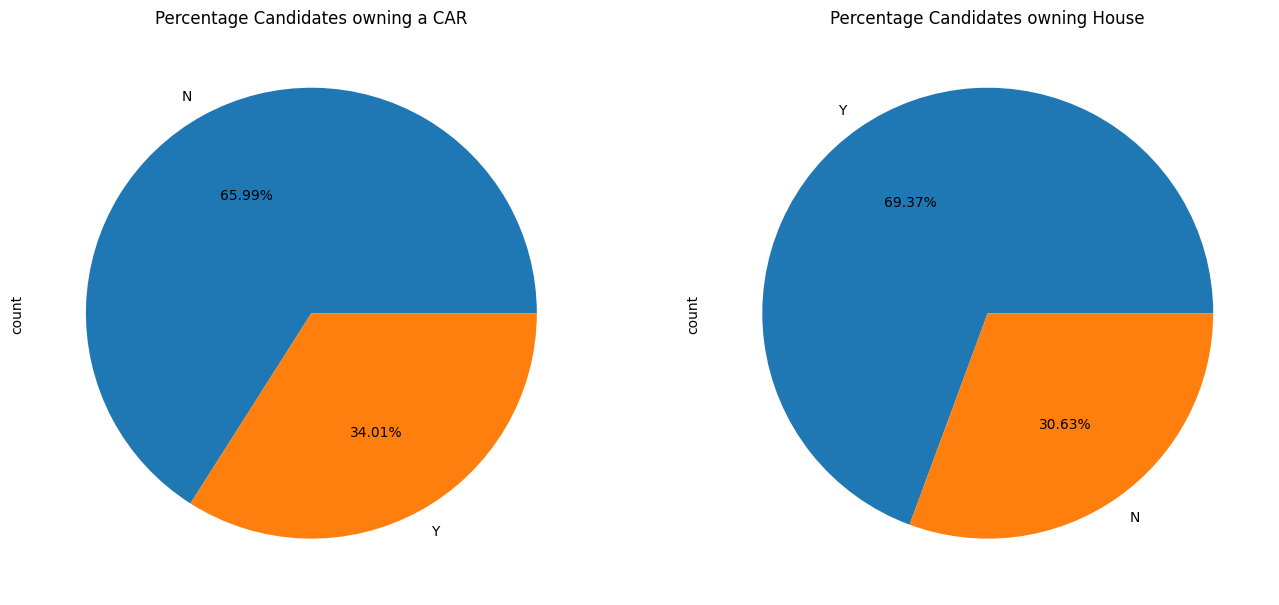

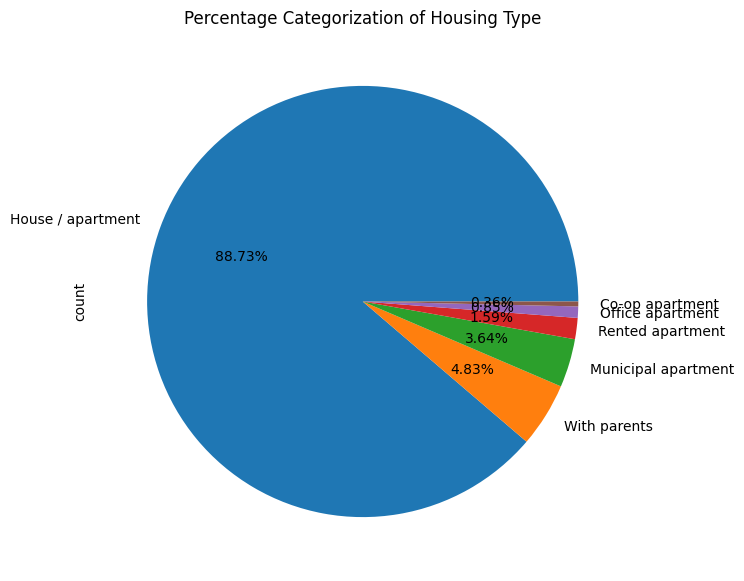

In [38]:
figure = plt.figure(figsize=[16,16])
plt.subplot(1,2,1)
plt.title('Percentage Candidates owning a CAR')
app_data.FLAG_OWN_CAR.value_counts().plot.pie(autopct=r'%1.2f%%')
plt.subplot(1,2,2)
plt.title('Percentage Candidates owning House')
app_data.FLAG_OWN_REALTY.value_counts().plot.pie(autopct=r'%1.2f%%')
plt.show()
figure = plt.figure(figsize=[7,7])
app_data.NAME_HOUSING_TYPE.value_counts().plot.pie(autopct=r'%1.2f%%')
plt.title('Percentage Categorization of Housing Type')
plt.show()

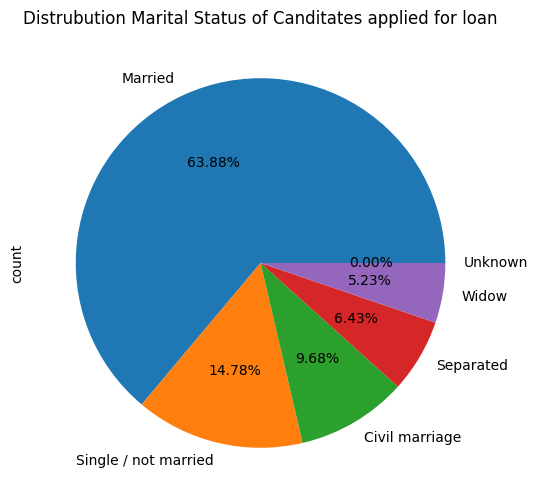

In [39]:
figure = plt.figure(figsize=[6,6])
plt.title('Distrubution Marital Status of Canditates applied for loan')
app_data.NAME_FAMILY_STATUS.value_counts().plot.pie(autopct=r'%1.2f%%')
plt.show()

- Inferences

1) Majority of Candidates applying for Loan are Married followed by Single. High possibility that they take loan for their future planning.

2) Most of the candidates taking loan had their own house but did'nt have a CAR. This is because if a candidate already is occupied by a car loan he is unlikely to take another loan at the same time.

3) Also it is less likely that the candidates with not any House of Own will take a Loan. This maybe due to their relatively less Financial Stability.

Analysis of Numerical columns

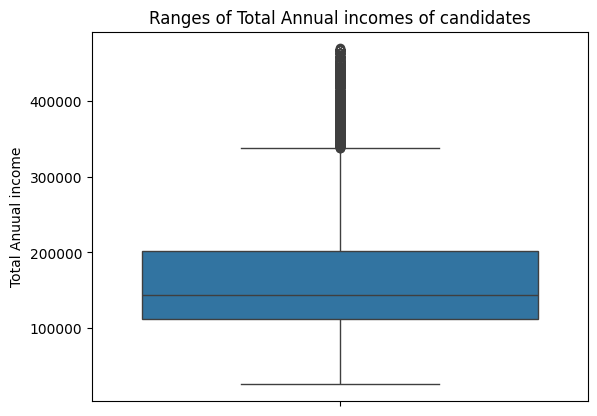

In [40]:
# There is an outlier with a very high income value in this column so we will do quantile(0.99) analysis for this
sns.boxplot(app_data.AMT_INCOME_TOTAL[app_data.AMT_INCOME_TOTAL < app_data.AMT_INCOME_TOTAL.quantile(0.99)])
plt.ylabel('Total Anuual income')
plt.title('Ranges of Total Annual incomes of candidates')
plt.show()


- Insights:

-- Most the candidates taking loan have salary below 2 lakhs per annum, there are less people taking loan those have salary above 2 lakhs. There is a datapoint having salary 12 lakhs per annum taking loan which is suspicious and should be given loan after proper verification.



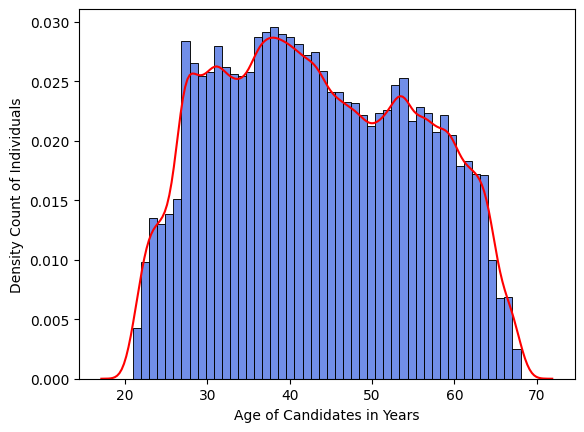

In [41]:
sns.histplot(app_data.Age, bins=50, color='royalblue', stat='density')
sns.kdeplot(app_data.Age, color='red')
plt.ylabel('Density Count of Individuals')
plt.xlabel('Age of Candidates in Years')
plt.show()

- Insights:

- Age group from mid 30's to mid 40's seem to have highest cluster of candidates applying for Loan.
- Young Age group 20's have relatively less loans, majority of them taking educational loan is to be assumed. Trend changes as we go forward into late 20's the number of candidates increases.
- Throughout 30's to 60's age group there are significantly higher number of candidates.
- Candidates decrease drastically after age group 60 as this is the period of retirement in India and most of the people become financially stable and are comparatively less likely to take loan.



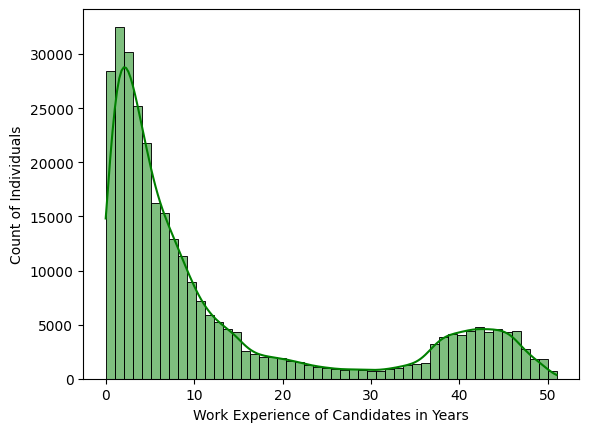

In [42]:
sns.histplot(app_data.Work_Experience, bins=50, color='Green', kde='True')
plt.ylabel('Count of Individuals')
plt.xlabel('Work Experience of Candidates in Years')
plt.show()

- Insights:

1) Pretty much like age factor, in the inital years of Work candidates seem to take loans as they comparatively have less financial burdens(different types of loans) on tem and can manage to clear the amount.

2) Trend decreases rapidly within 10-15 years and we have very less number of candidates in this range.

3) We again see a slight increase in Loan candidates in the last 10 years 40-50 years of work experience group.
   These maybe candidates who preferred investing in properties or starting a small scale family business.



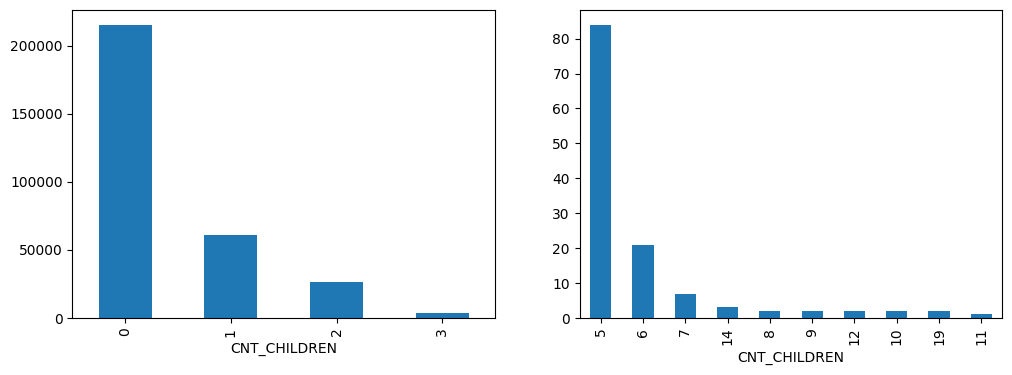

In [44]:
figure = plt.figure(figsize=[12, 4])
plt.subplot(1,2,1)
app_data.CNT_CHILDREN[app_data.CNT_CHILDREN < 4].value_counts().plot.bar()
plt.subplot(1,2,2)
app_data.CNT_CHILDREN[app_data.CNT_CHILDREN > 4].value_counts().plot.bar()
plt.show()

- Insights

1) As expected candidates with less number of children tend to take more loans.
2) Loan Trend decreases as number of children increase.

3) Hence here we can safely say that count of children has negative linear relationship with possibility of candidate taking a loan.

Multivariate Analysis

Income vs Loan Annuity

In [58]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'Age',
       'Work_Experience', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'Total_Documents',
       'avg_credit_sc'],
      dtype='object')

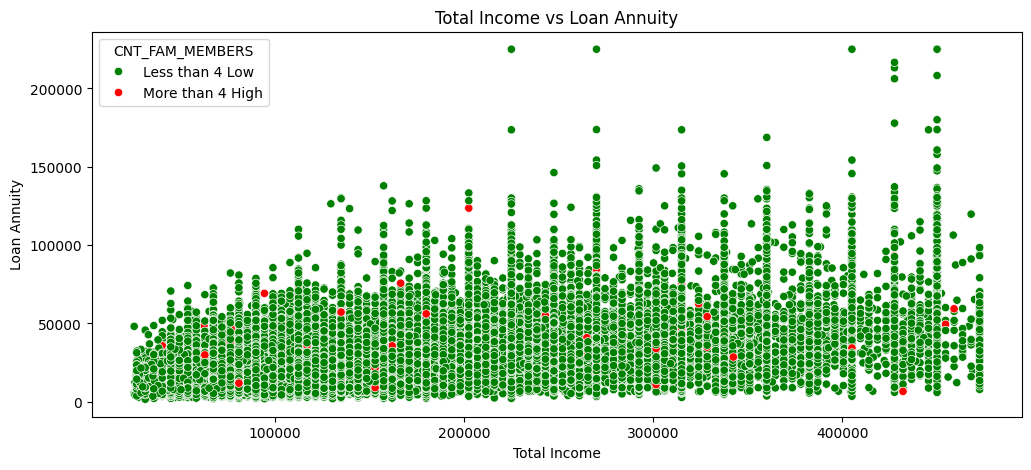

In [46]:
# app_data.AMT_INCOME_TOTAL.quantile(0.99) = 472500.0
# app_data.AMT_INCOME_TOTAL.quantile(1.) = 117000000.0
# Since there is an outlier here we will again do quantile analysis by ignoring these large values.
figure=plt.figure(figsize=[12,5])
sns.scatterplot(data=app_data[app_data.AMT_INCOME_TOTAL <= 472500.0], x='AMT_INCOME_TOTAL', 
                y = 'AMT_ANNUITY', hue='CNT_FAM_MEMBERS', palette=['green', 'Red'])
plt.xlabel('Total Income')
plt.ylabel('Loan Annuity')
plt.title('Total Income vs Loan Annuity')
plt.show()


- Insights:

- Most Common Annuity amount seems to under 1 Lakh. 
- With increasing income significant percentage of candidates seem to have Annuity amount between 1 lakh to 1.5 lakh. And only some percentage of candidates have Loan Annuity more that 1.5 Lakhs.
- Candidates with Less count of Family members seem be ready for paying more Annuity
- Candidates with High Family count are likely to pay less Annuity amount even in the case of Greater salary

Income vs Amount Credit

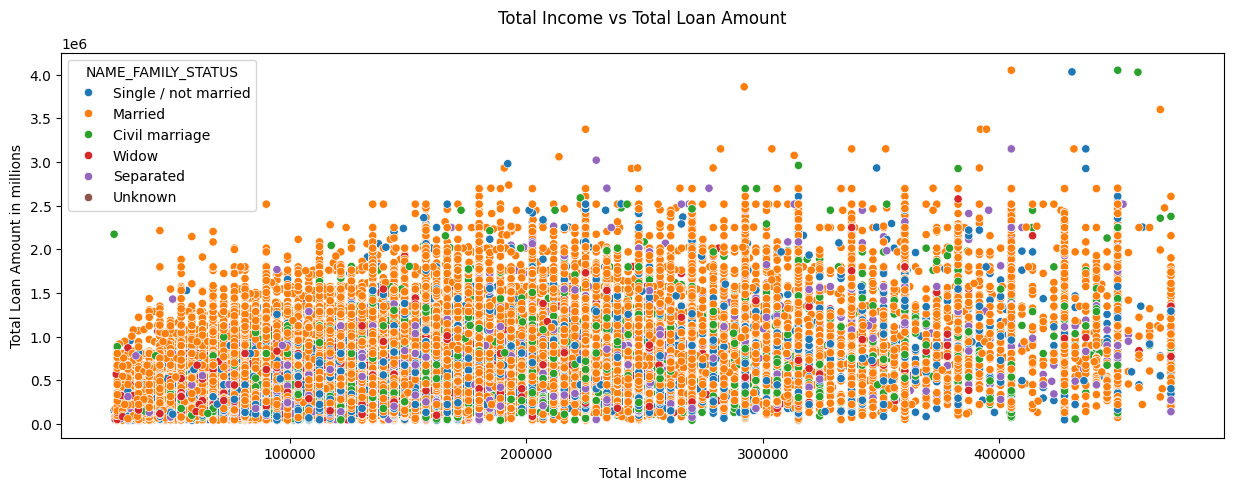

In [48]:
figure=plt.figure(figsize=[15,5])
sns.scatterplot(data = app_data[app_data.AMT_INCOME_TOTAL <= 472500.0], x=app_data.AMT_INCOME_TOTAL, 
                y = app_data.AMT_CREDIT, hue='NAME_FAMILY_STATUS')
plt.title('Total Income vs Total Loan Amount\n')
plt.xlabel('Total Income')
plt.ylabel('Total Loan Amount in millions')
plt.show()

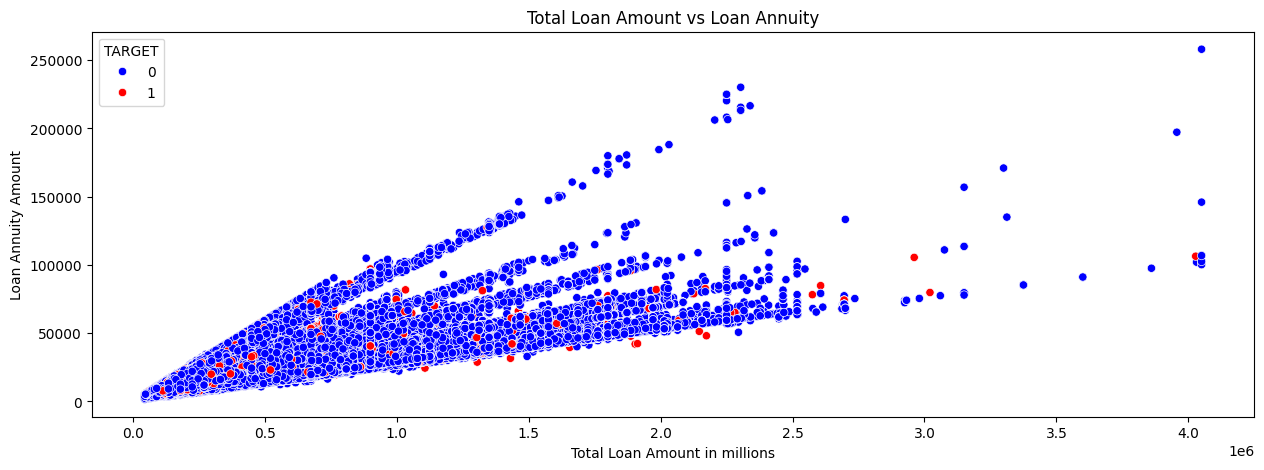

In [51]:
figure=plt.figure(figsize=[15,5])
sns.scatterplot(data=app_data, x='AMT_CREDIT', y = 'AMT_ANNUITY', hue='TARGET', palette=['Blue', 'Red'])
plt.title('Total Loan Amount vs Loan Annuity')
plt.xlabel('Total Loan Amount in millions')
plt.ylabel('Loan Annuity Amount')
plt.show()

- There is a strong positive linear relation observed between Amount Credit and Amount Annuity.
- But it's strange that candidates with comparatively Lower Annuity are observed having more payment issues

Age vs Loan Amount

In [52]:
target_0.Age = pd.cut(x=target_0.Age, bins=[20,30,40,50,60,70], labels=['20-30', '30-40', '40-50', '50-60', '>60'])
target_1.Age = pd.cut(x=target_1.Age, bins=[20,30,40,50,60,70], labels=['20-30', '30-40', '40-50', '50-60', '>60'])

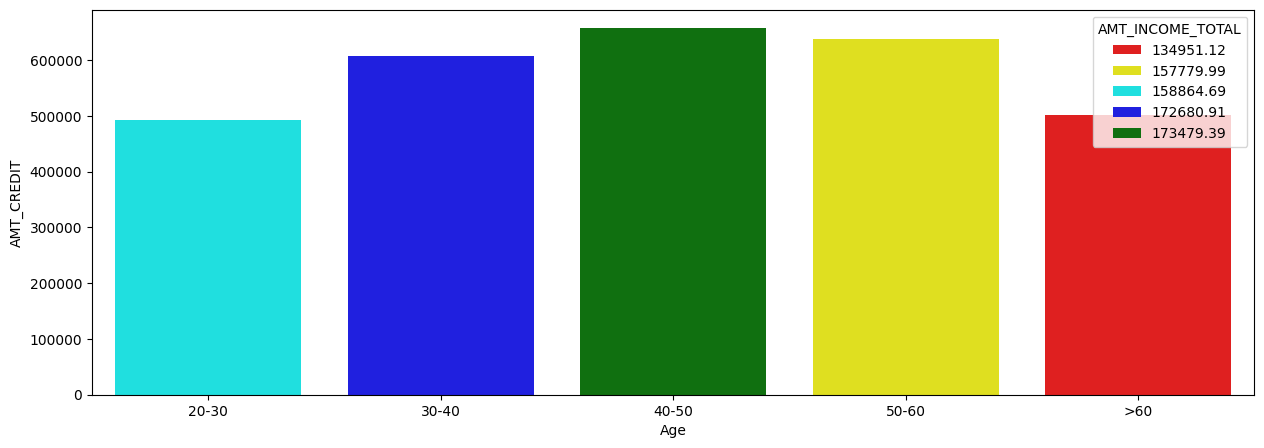

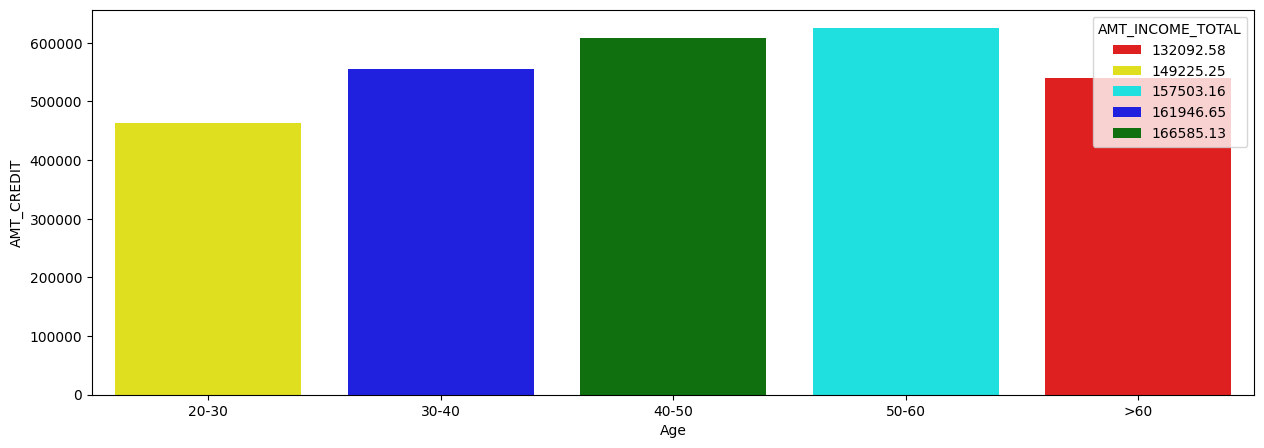

In [53]:
figure=plt.figure(figsize=[15,5])
ACI = target_0[target_0.AMT_INCOME_TOTAL <= 472500.0].groupby(['Age'])[['AMT_CREDIT', 'AMT_INCOME_TOTAL']].mean().round(2)
ACI1 = target_1[target_1.AMT_INCOME_TOTAL <= 472500.0].groupby(['Age'])[['AMT_CREDIT', 'AMT_INCOME_TOTAL']].mean().round(2)
sns.barplot(data=ACI, x='Age', y='AMT_CREDIT', hue='AMT_INCOME_TOTAL', palette=['red','yellow', 'cyan', 'blue', 'green'])
plt.show()
figure=plt.figure(figsize=[15,5])
sns.barplot(data=ACI1, x='Age', y='AMT_CREDIT', hue='AMT_INCOME_TOTAL', palette=['red','yellow', 'cyan', 'blue', 'green'])
plt.show()

It can be seen that in case of Payment issues people in Age Group > 60 were given more Loans even when their mean salary was less which resulted into Default.

Average Credit Score vs Loan Amount

In [54]:
app_data['Age_Curr_Phone'] = pd.cut(x = app_data.DAYS_LAST_PHONE_CHANGE, bins=[0, 365, 1095, 5000], labels=['< 1 year', '< 3 years', '> 3 years'])

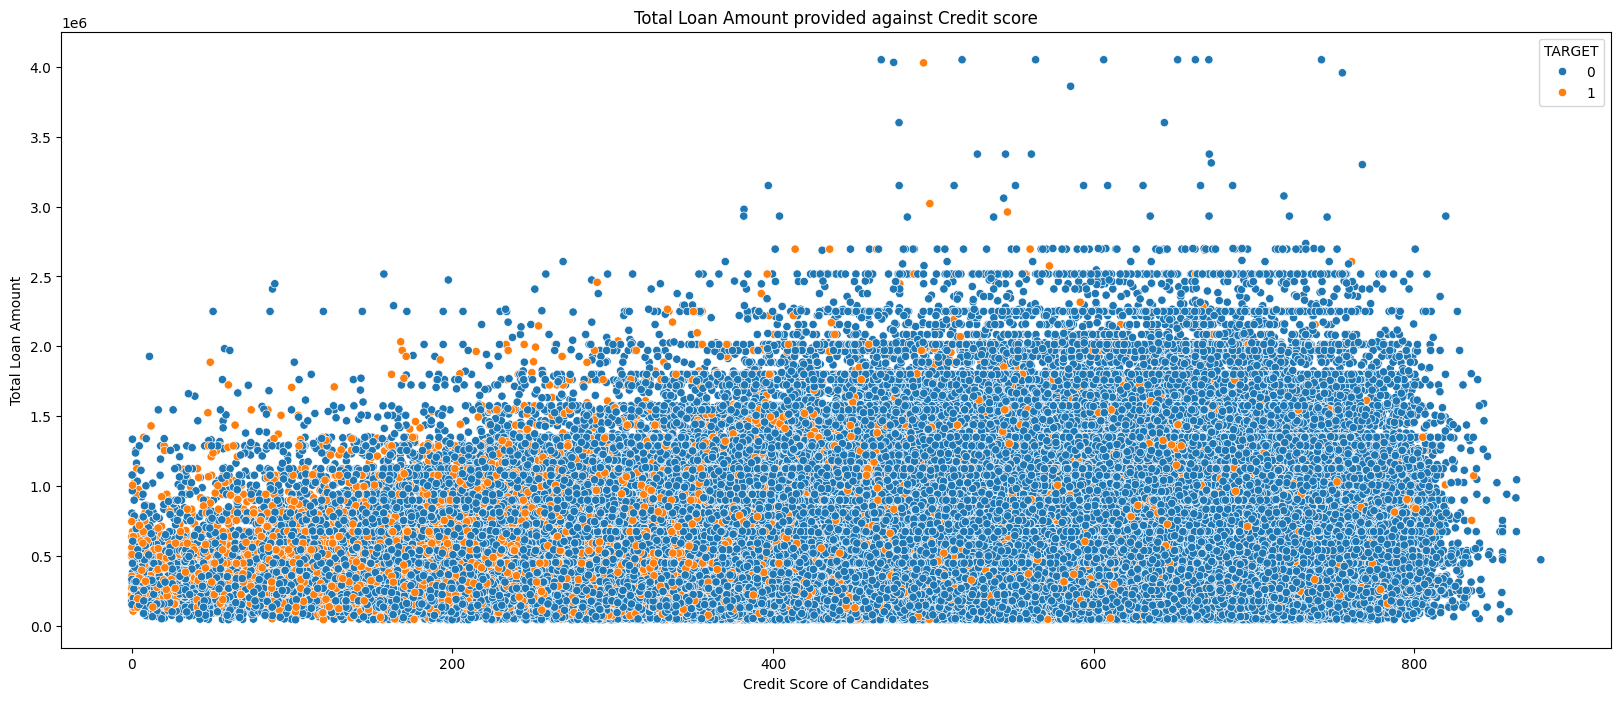

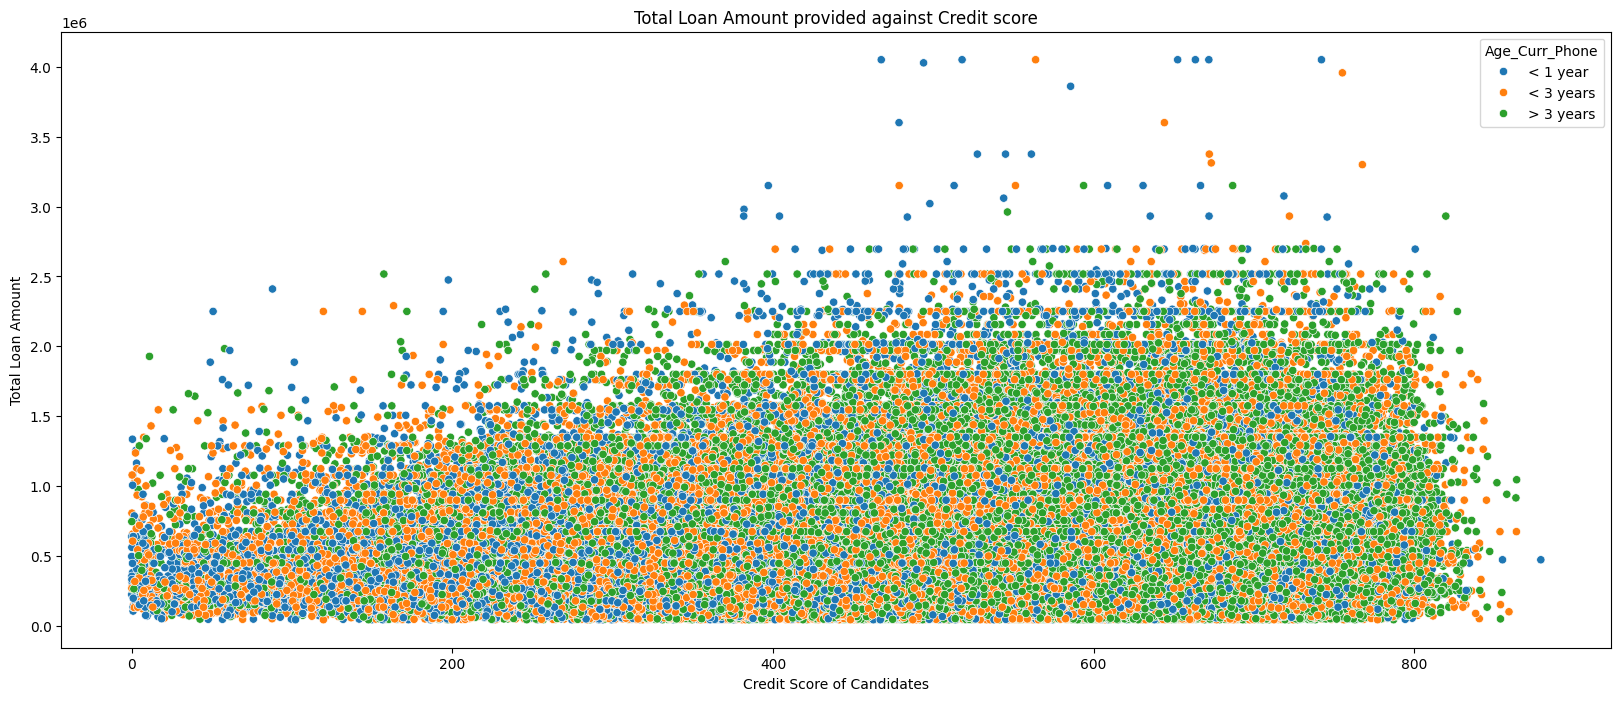

In [58]:
figure=plt.figure(figsize=[20,8])
sns.scatterplot(data=app_data, x='avg_credit_sc', y='AMT_CREDIT', hue='TARGET')
plt.xlabel('Credit Score of Candidates')
plt.ylabel('Total Loan Amount')
plt.title('Total Loan Amount provided against Credit score')
plt.show()
figure=plt.figure(figsize=[20,8])
sns.scatterplot(data=app_data, x='avg_credit_sc', y='AMT_CREDIT', hue='Age_Curr_Phone')
plt.xlabel('Credit Score of Candidates')
plt.ylabel('Total Loan Amount')
plt.title('Total Loan Amount provided against Credit score')
plt.show()

- Insights:

1) Most of the Candidates who have Low Credit Scores show payment issues. And Candidates with Medium to high Credit Scores has less instances of Payment issues hence increasing chances of getting greater amount as Loan. We will research further on this to strenghthen this claim.

2) Also Its Observable from second plot that Candidates who have changed their phone recently 1 - 3 years back they generally tend to have low credit scores compared to candidates who don't change their phones recently. Now here we can also raise a valid point that there must some genuine reason in changing the phone or maybe this was for the first time to do so. So we will Individually analyse this pattern to gain some more insights on this.

To check if payment issues are really dependent on credit scores of candidates or not we will boxplot Payment issues against Credit Score.

TARGET VS CREDIT SCORE

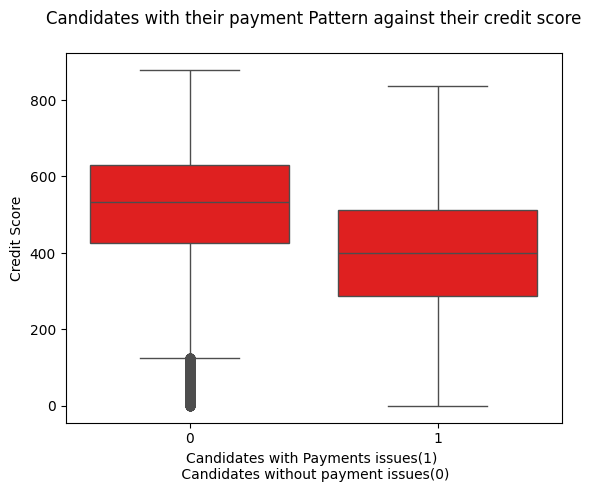

In [59]:
sns.boxplot(data=app_data, x='TARGET', y='avg_credit_sc',color='red')
plt.xlabel('Candidates with Payments issues(1) \n Candidates without payment issues(0)')
plt.ylabel('Credit Score')
plt.title('Candidates with their payment Pattern against their credit score\n')
plt.show()

- Insights:

- We can clearly see that Candidates with Payment issues have a median credit score around 400 which is less that of candidates with no payment issues who have median credit score around 550.

Mortaged ITEM Price vs Loan Amount

In [60]:
target_0['Income_Range'] = pd.qcut(x = target_0.AMT_INCOME_TOTAL,q= [0, 0.25, 0.75, 1.], labels=['< 1.25 LPA', '< 2 LPA', '> 2 LPA'])

In [61]:
target_1['Income_Range'] = pd.qcut(x = target_1.AMT_INCOME_TOTAL,q= [0, 0.25, 0.75, 1.], labels=['< 1.25 LPA', '< 2 LPA', '> 2 LPA'])

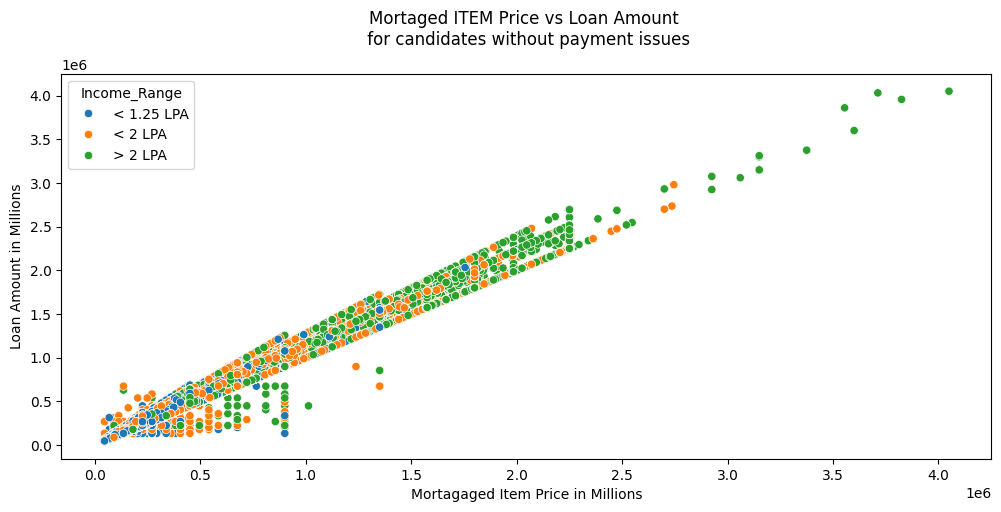

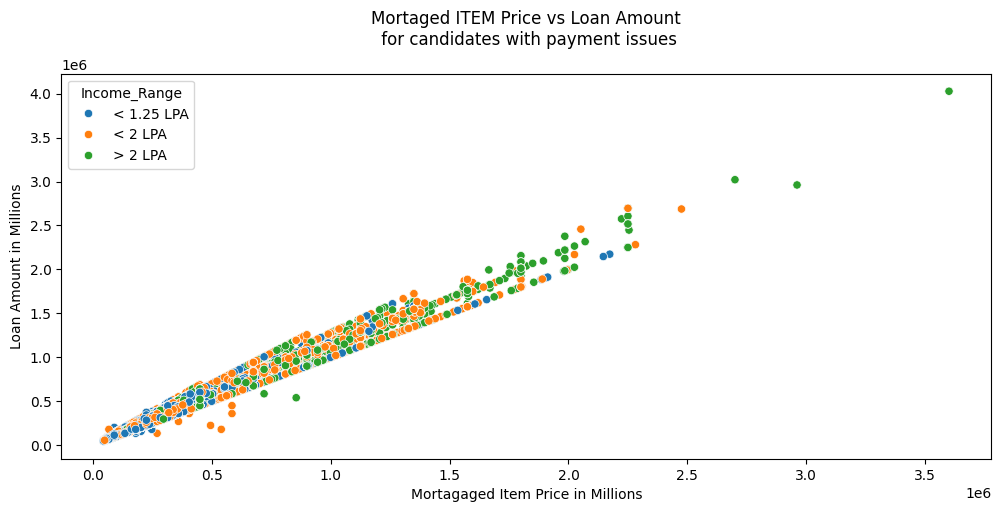

In [64]:
figure = plt.figure(figsize=[12, 5])
sns.scatterplot(data=target_0, x='AMT_GOODS_PRICE', y='AMT_CREDIT', hue='Income_Range')
plt.title('Mortaged ITEM Price vs Loan Amount \n for candidates without payment issues\n')
plt.xlabel('Mortagaged Item Price in Millions')
plt.ylabel('Loan Amount in Millions')
plt.show()

figure = plt.figure(figsize=[12, 5])
sns.scatterplot(data=target_1, x='AMT_GOODS_PRICE', y='AMT_CREDIT', hue='Income_Range')
plt.title('Mortaged ITEM Price vs Loan Amount\n for candidates with payment issues\n')
plt.xlabel('Mortagaged Item Price in Millions')
plt.ylabel('Loan Amount in Millions')
plt.show()

- Insights

- Seems that more the Price of Mortageged Item, chances of getting greater amount as a loan increases.
- For Candidates with No Payment issues, Candidates with Greater salary have kept High valued Goods as mortagage and vice versa overall.
- But In the plot of Candidates with Payment issues there were many such instances seen that candidates with lower salary ranges also keeping high valued Goods as mortagage and securing a greater loan. This maybe the reason why these candidates later got into the category of Payment issue.
- It is important to investigate if mortagaging high valued items are possible for individuals with lower salary range. Some maybe genuine or ancestral property but that should be confirmed.

Confirming if Frequently changing Mobile Phone Leads to payment issues or not

Plotting Payment issues against Days passed since last phone change

count    282685.000000
mean        976.388294
std         831.210739
min           0.000000
25%         281.000000
50%         776.000000
75%        1586.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64
count    24825.000000
mean       808.796818
std        758.090713
min          0.000000
25%        194.000000
50%        594.000000
75%       1301.000000
max       4070.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


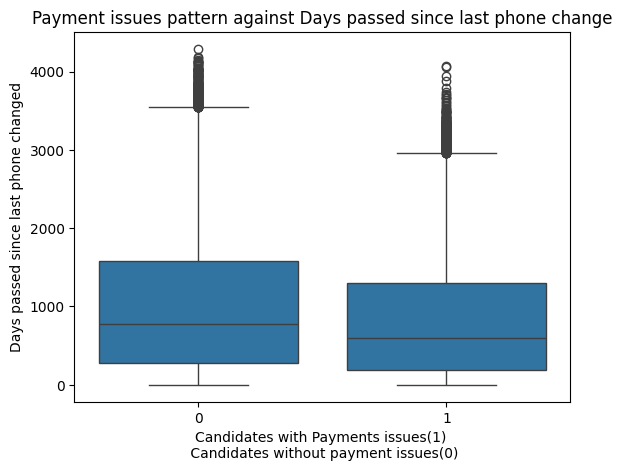

In [68]:
print(target_0.DAYS_LAST_PHONE_CHANGE.describe())#Candidates without payment issues
print('='*70)
print(target_1.DAYS_LAST_PHONE_CHANGE.describe())#Candidates with payment issues
print('='*70)
sns.boxplot(data=app_data, x='TARGET', y='DAYS_LAST_PHONE_CHANGE')
plt.title('Payment issues pattern against Days passed since last phone change')
plt.xlabel('Candidates with Payments issues(1) \n Candidates without payment issues(0)')
plt.ylabel('Days passed since last phone changed')
plt.show()

1) People with payment issues seems to have less intervals between current and last phone change.

2) Possible reason explaining this slight variation can be that people who change their phone or other commodities frequently have more buying habits which leads to payment issues for some individuals.

3) This confirms that there is dependency of payment issues with buying habits of candidates

Comparing Income Type vs Housing Type vs Amount Annuity

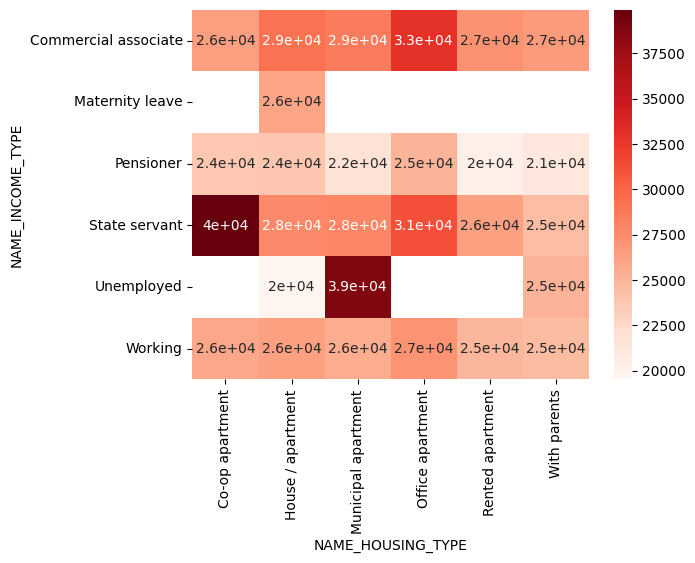

In [69]:
HIA_rel = pd.pivot_table(data=target_1, index='NAME_INCOME_TYPE', columns='NAME_HOUSING_TYPE', values='AMT_ANNUITY')
sns.heatmap(HIA_rel, annot=True, cmap='Reds')
plt.show()

Insights

State servant and Unemployed living in Co Apartment and Municipal Apartment respectively from candidates with payment issues seem to have got bigger amount of loans. Currently this is just a co-relation and more research would be needed to determine the underlying reasons for these patterns.

Comparing Occupation Type vs Family Status vs average of Total Loan Amount Provided to people with Payments issues.

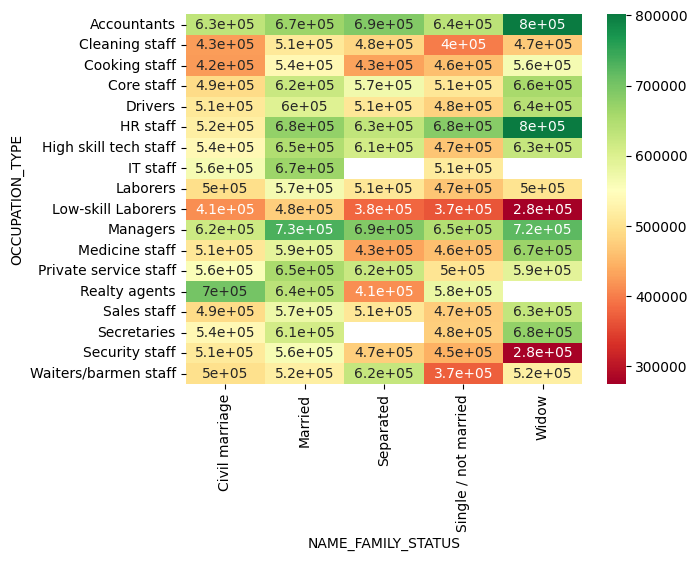

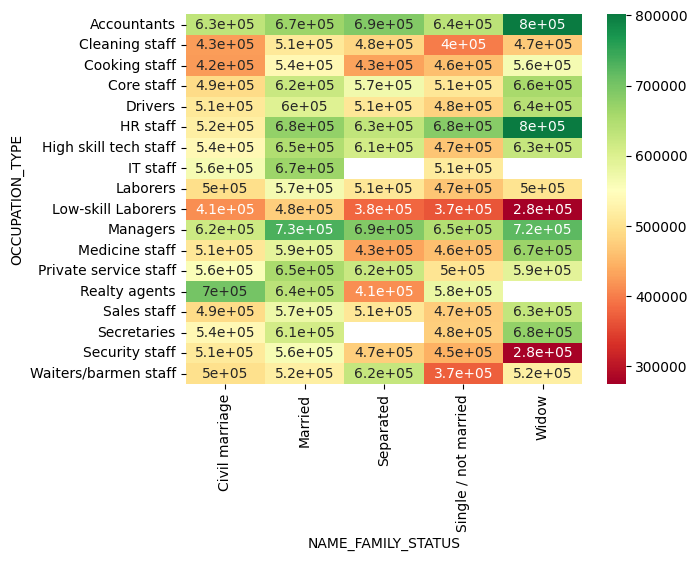

In [70]:
FOL_Rel = pd.pivot_table(data=target_1, index='OCCUPATION_TYPE', columns='NAME_FAMILY_STATUS', values='AMT_CREDIT')
sns.heatmap(FOL_Rel, cmap='RdYlGn', annot=True, center=550000)
plt.show()

FOL_Rel0 = pd.pivot_table(data=target_0, index='OCCUPATION_TYPE', columns='NAME_FAMILY_STATUS', values='AMT_CREDIT')
sns.heatmap(FOL_Rel, cmap='RdYlGn', annot=True, center=550000)
plt.show()

Insights

Changing Observed and defaulted count in social circle within 30/60 days into categorical values.

In [71]:
target_0.OBS_30_CNT_SOCIAL_CIRCLE = pd.cut(x=target_0.OBS_30_CNT_SOCIAL_CIRCLE ,bins=[0, 12, 25, 35], labels=['0-10', '10-20', '>20'])
target_1.OBS_30_CNT_SOCIAL_CIRCLE = pd.cut(x=target_1.OBS_30_CNT_SOCIAL_CIRCLE ,bins=[0, 12, 25, 35], labels=['0-10', '10-20', '>20'])
target_0.DEF_30_CNT_SOCIAL_CIRCLE = pd.cut(x=target_0.DEF_30_CNT_SOCIAL_CIRCLE ,bins=[0, 3, 40], labels=['Low', 'High'])
target_1.DEF_30_CNT_SOCIAL_CIRCLE = pd.cut(x=target_1.DEF_30_CNT_SOCIAL_CIRCLE ,bins=[0, 3, 40], labels=['Low', 'High'])
target_0.OBS_60_CNT_SOCIAL_CIRCLE = pd.cut(x=target_0.OBS_60_CNT_SOCIAL_CIRCLE ,bins=[0, 12, 25, 35], labels=['0-10', '10-25', '>20'])
target_1.OBS_60_CNT_SOCIAL_CIRCLE = pd.cut(x=target_1.OBS_60_CNT_SOCIAL_CIRCLE ,bins=[0, 12, 25, 35], labels=['0-10', '10-25', '>20'])
target_0.DEF_60_CNT_SOCIAL_CIRCLE = pd.cut(x=target_0.DEF_60_CNT_SOCIAL_CIRCLE ,bins=[0, 3, 40], labels=['Low', 'High'])
target_1.DEF_60_CNT_SOCIAL_CIRCLE = pd.cut(x=target_1.DEF_60_CNT_SOCIAL_CIRCLE ,bins=[0, 3, 40], labels=['Low', 'High'])

Plotting Total Credit Amount provided as Loan against credit score of candidates with  and without payment issues. Also Among them marking who all were observed and defaulted in last 30-60 days.

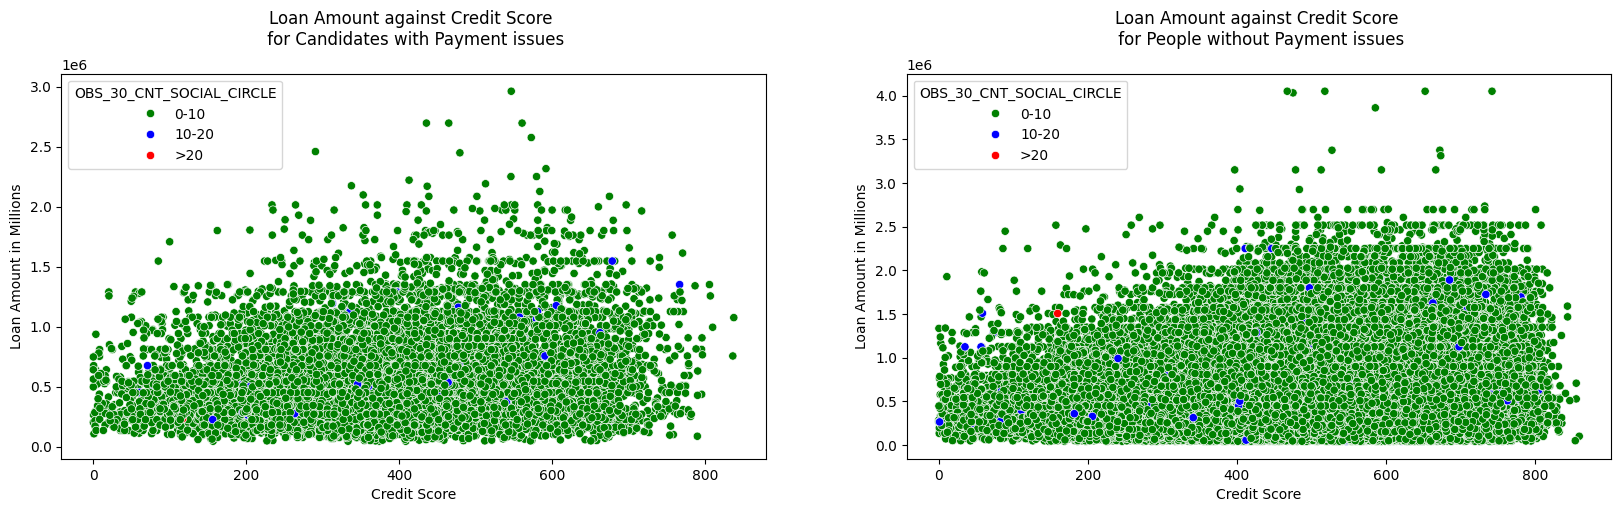

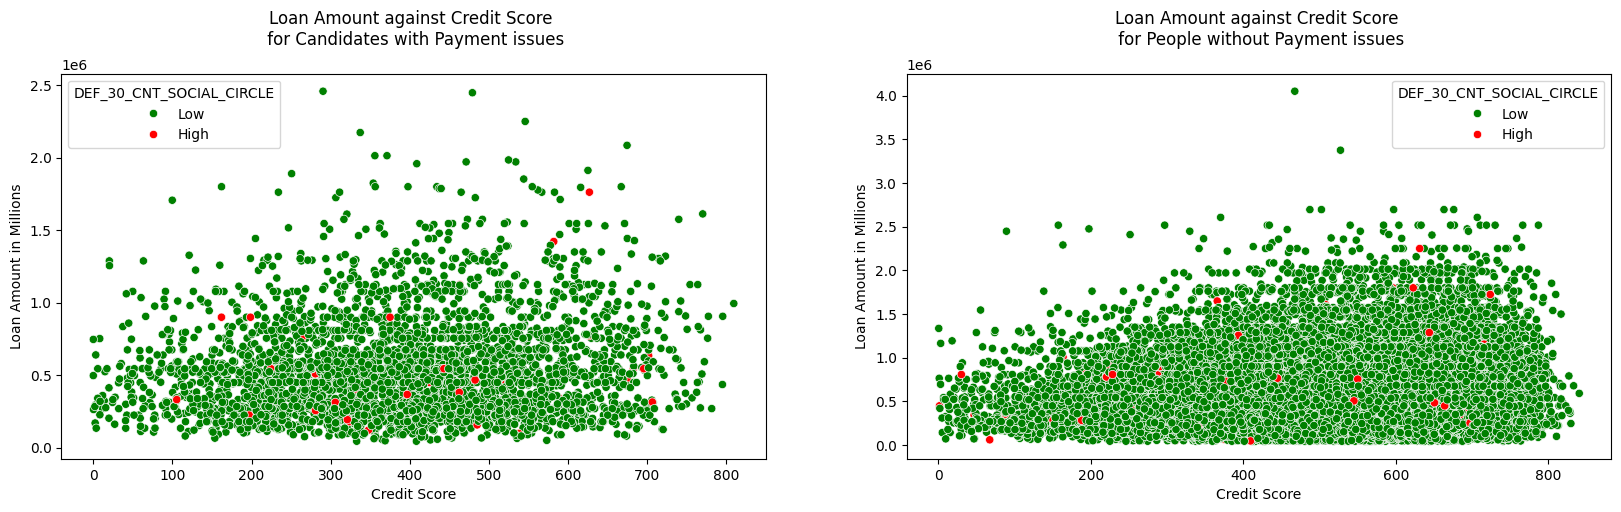

In [72]:
figure = plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
dark = sns.color_palette(['Green', 'Blue', 'Red'])
sns.scatterplot(data=target_1, x='avg_credit_sc', y='AMT_CREDIT', hue='OBS_30_CNT_SOCIAL_CIRCLE', 
                palette=dark)
plt.title('Loan Amount against Credit Score \n for Candidates with Payment issues\n')
plt.xlabel('Credit Score')
plt.ylabel('Loan Amount in Millions')
plt.subplot(1,2,2)
sns.scatterplot(data=target_0, x='avg_credit_sc', y='AMT_CREDIT', hue='OBS_30_CNT_SOCIAL_CIRCLE', 
                palette=dark)
plt.title('Loan Amount against Credit Score \n for People without Payment issues\n')
plt.xlabel('Credit Score')
plt.ylabel('Loan Amount in Millions')
plt.show()

figure = plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
dark = sns.color_palette(['Green','Red'])
plt.title('Loan Amount against Credit Score \n for Candidates with Payment issues\n')
plt.xlabel('Credit Score')
plt.ylabel('Loan Amount in Millions')
sns.scatterplot(data=target_1, x='avg_credit_sc', y='AMT_CREDIT', hue='DEF_30_CNT_SOCIAL_CIRCLE', 
                palette=dark)
plt.subplot(1,2,2)
sns.scatterplot(data=target_0, x='avg_credit_sc', y='AMT_CREDIT', hue='DEF_30_CNT_SOCIAL_CIRCLE', 
                palette=dark)
plt.title('Loan Amount against Credit Score \n for People without Payment issues\n')
plt.xlabel('Credit Score')
plt.ylabel('Loan Amount in Millions')
plt.show()

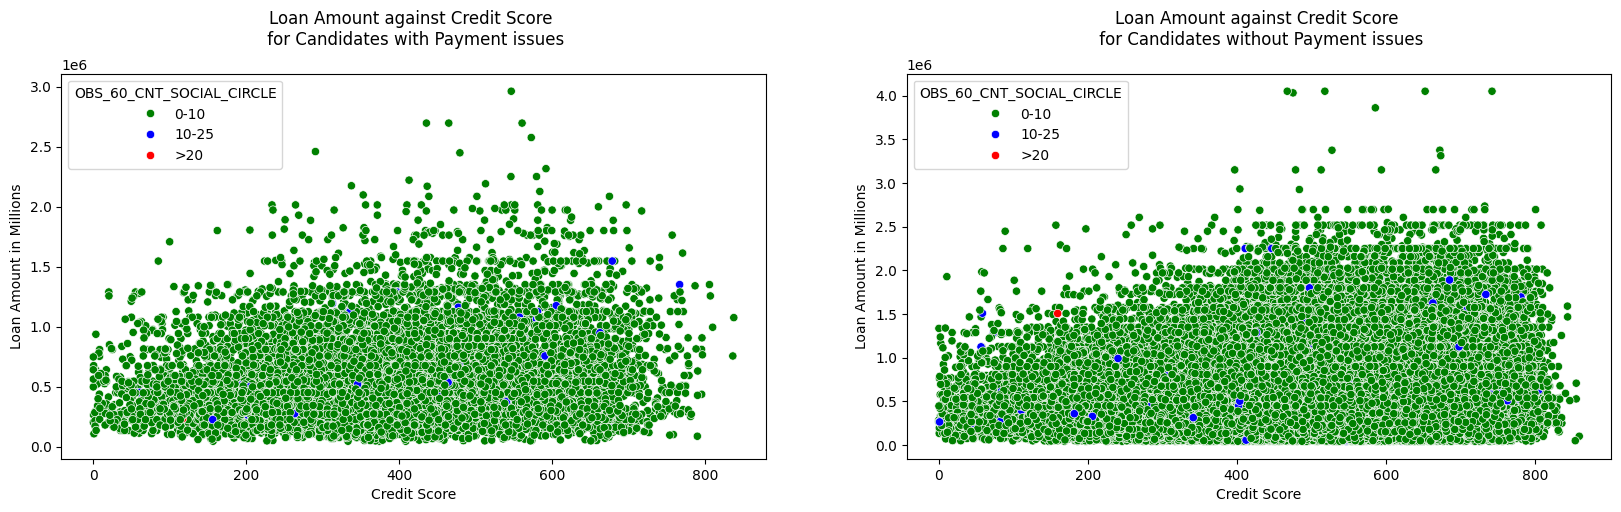

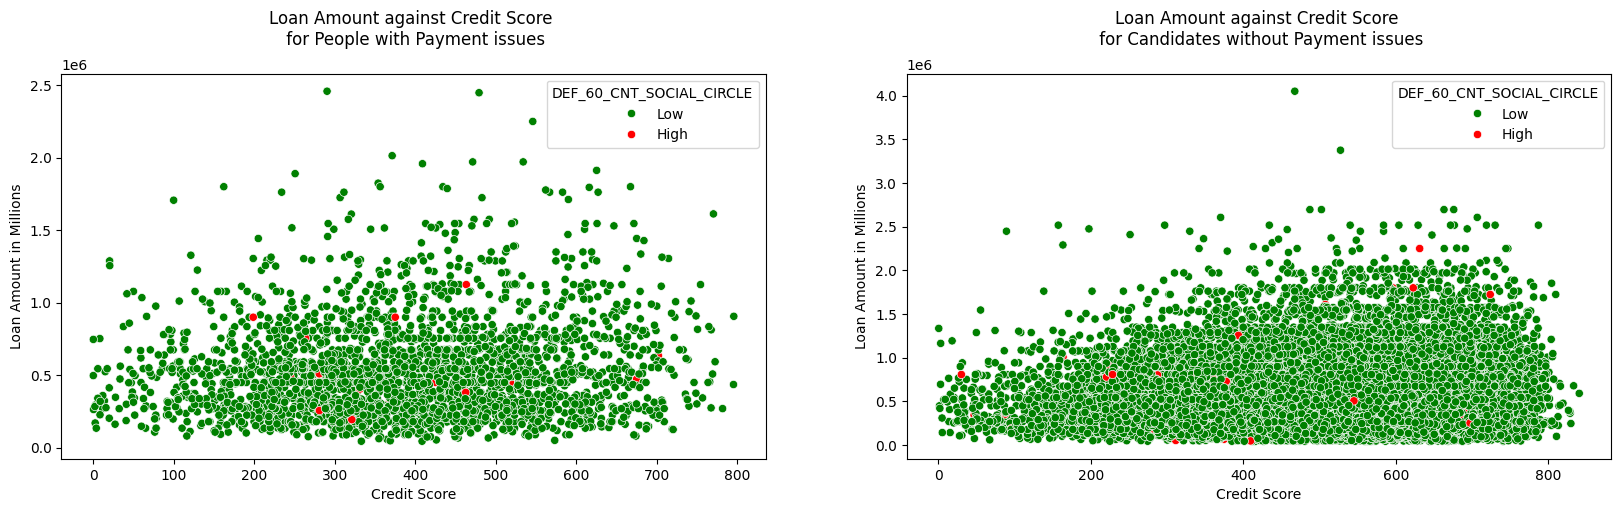

In [73]:
figure = plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
dark = sns.color_palette(['Green', 'Blue', 'Red'])
sns.scatterplot(data=target_1, x='avg_credit_sc', y='AMT_CREDIT', hue='OBS_60_CNT_SOCIAL_CIRCLE', 
                palette=dark)
plt.title('Loan Amount against Credit Score \n for Candidates with Payment issues\n')
plt.xlabel('Credit Score')
plt.ylabel('Loan Amount in Millions')
plt.subplot(1,2,2)
sns.scatterplot(data=target_0, x='avg_credit_sc', y='AMT_CREDIT', hue='OBS_60_CNT_SOCIAL_CIRCLE', 
                palette=dark)
plt.title('Loan Amount against Credit Score \n for Candidates without Payment issues\n')
plt.xlabel('Credit Score')
plt.ylabel('Loan Amount in Millions')
plt.show()

figure = plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
dark = sns.color_palette(['Green','Red'])
sns.scatterplot(data=target_1, x='avg_credit_sc', y='AMT_CREDIT', hue='DEF_60_CNT_SOCIAL_CIRCLE', 
                palette=dark)
plt.title('Loan Amount against Credit Score \n for People with Payment issues\n')
plt.xlabel('Credit Score')
plt.ylabel('Loan Amount in Millions')
plt.subplot(1,2,2)
sns.scatterplot(data=target_0, x='avg_credit_sc', y='AMT_CREDIT', hue='DEF_60_CNT_SOCIAL_CIRCLE', 
                palette=dark)
plt.title('Loan Amount against Credit Score \n for Candidates without Payment issues\n')
plt.xlabel('Credit Score')
plt.ylabel('Loan Amount in Millions')
plt.show()

- Insights

- It can be observed that for candidates with payment issues high default rate in his social circle is present within 30-60 days compared to candidates without payment issues.

- Also most of the people who defaulted or were observed to default generally also had comparatively less credit score.

- Candidates whose social circle had very high observed and actual default instances they are seen to have less credit score.

- This means surrounding in which candidate live also has some effect on his credit scores ultimately affecting his payment patterns.

Plotting Total Loan Amount provided against Mortagaged item price for candidates with and without payment issues. Also marking number of documents provided by each among them.

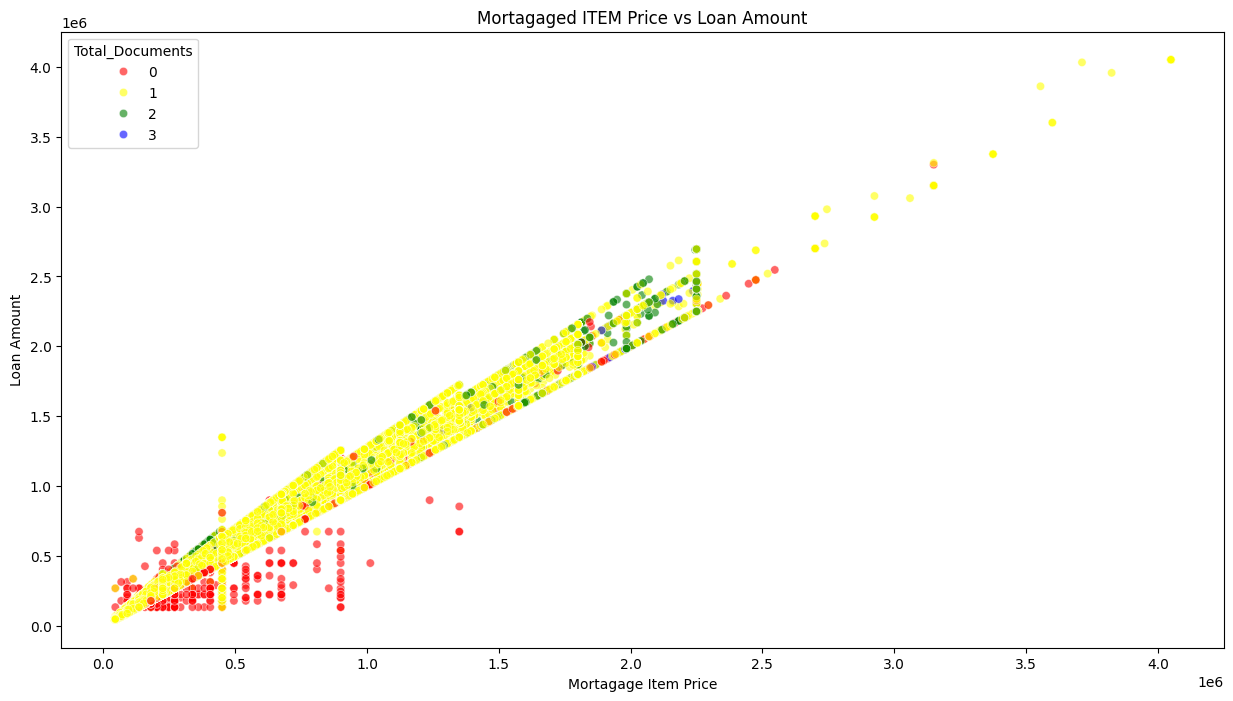

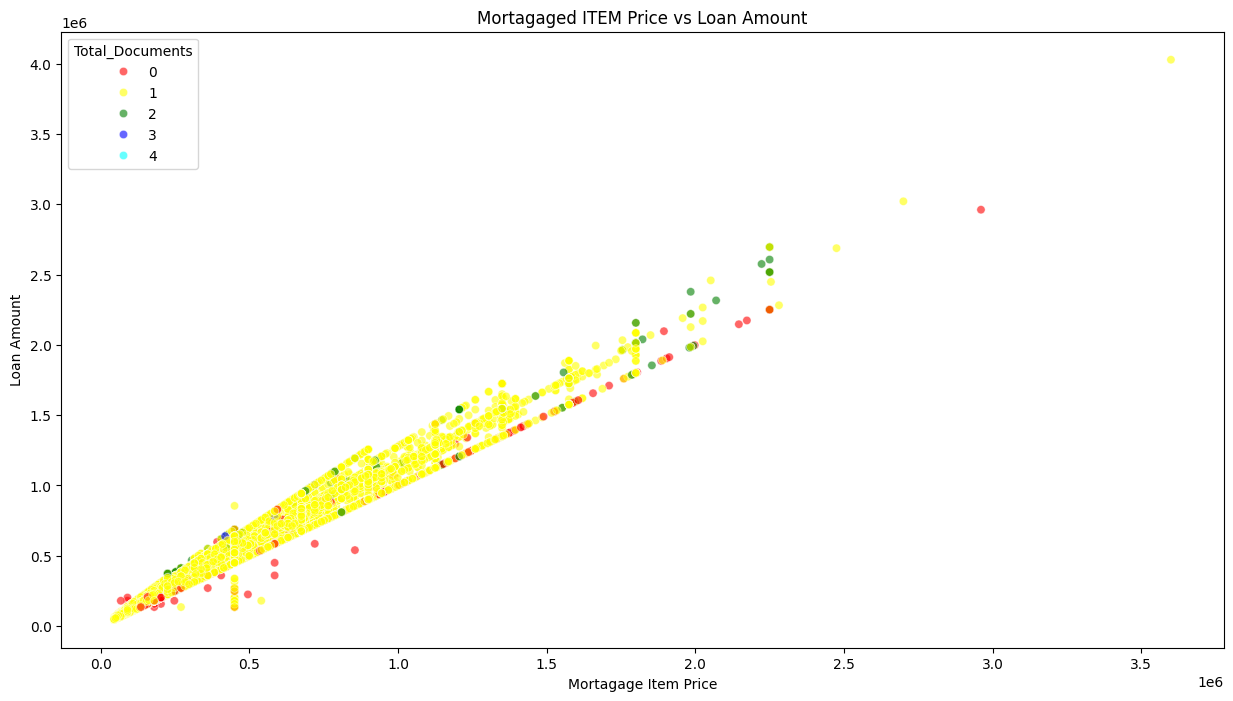

In [125]:
dark = ['Red', 'Yellow','Green', 'Blue', 'Cyan']
figure = plt.figure(figsize=[15,8])
sns.scatterplot(data=target_0, x='AMT_GOODS_PRICE', y='AMT_CREDIT', hue='Total_Documents', palette=dark, alpha=0.6)
plt.title('Mortagaged ITEM Price vs Loan Amount')
plt.xlabel('Mortagage Item Price')
plt.ylabel('Loan Amount')
plt.show()

figure = plt.figure(figsize=[15,8])
sns.scatterplot(data=target_1, x='AMT_GOODS_PRICE', y='AMT_CREDIT', hue='Total_Documents', palette=dark, alpha=0.6)
plt.title('Mortagaged ITEM Price vs Loan Amount')
plt.xlabel('Mortagage Item Price')
plt.ylabel('Loan Amount')
plt.show()

- Insights

1) Candidates(without payment issues) who gave no documents got low price loans and also mortagaged low valued items.

2) Most of the Candidates of both the Category had atleast submitted one document.

3) Candidates who submitted more documents generally had more chances of getting greater amount as loan.

4) Candidates who were given high amount as loan without even one document later showed payment issues.

Reading dataset containing previous loan history if existed of Candidates

In [202]:
pre_app = pd.read_csv('previous_application.csv')

In [203]:
pre_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

Dropping Irrelevant columns

In [204]:
pre_app.drop(pre_app.loc[:, 'WEEKDAY_APPR_PROCESS_START':], inplace=True, axis=1)

In [205]:
pre_app.drop('SK_ID_PREV', inplace=True, axis=1)

Choosing sample of 25000 records as the dataset is too huge

In [245]:
pre_app_samp = pre_app.sample(25000)

In [246]:
pre_app_samp.shape

(25000, 7)

Merging this new dataset containing loan history with current loan information dataset on current loan ID and keeping only common records which exist in both datasets because a single candidate has took more than one loan which will cause duplicate values

In [247]:
All_Loans = app_data.merge(pre_app_samp, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [248]:
All_Loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21057 entries, 0 to 21056
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   SK_ID_CURR                  21057 non-null  int64   
 1   TARGET                      21057 non-null  int64   
 2   NAME_CONTRACT_TYPE_x        21057 non-null  object  
 3   CODE_GENDER                 21057 non-null  object  
 4   FLAG_OWN_CAR                21057 non-null  object  
 5   FLAG_OWN_REALTY             21057 non-null  object  
 6   CNT_CHILDREN                21057 non-null  int64   
 7   AMT_INCOME_TOTAL            21057 non-null  float64 
 8   AMT_CREDIT_x                21057 non-null  float64 
 9   AMT_ANNUITY_x               21057 non-null  float64 
 10  AMT_GOODS_PRICE_x           21057 non-null  float64 
 11  NAME_TYPE_SUITE             21057 non-null  object  
 12  NAME_INCOME_TYPE            21057 non-null  object  
 13  NAME_EDUCATION_T

Renaming new columns appropriately

In [249]:
All_Loans.rename(columns={'NAME_CONTRACT_TYPE_y' : 'NAME_CONTRACT_TYPE_previous',
                          'AMT_ANNUITY_y': 'AMT_ANNUITY_previous',
                          'AMT_APPLICATION' : 'AMT_APPLICATION_previous',
                          'AMT_CREDIT_y': 'AMT_CREDIT_previous',
                          'AMT_DOWN_PAYMENT': 'AMT_DOWN_PAYMENT_previous',
                          'AMT_GOODS_PRICE_y': 'AMT_GOODS_PRICE_previous'}, inplace=True)

Again differentiating datasets on the basis of target variable

In [250]:
targ0 = All_Loans[All_Loans.TARGET == 0]
targ1 = All_Loans[All_Loans.TARGET == 1] 

In [251]:
All_Loans.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE_x               0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT_x                       0
AMT_ANNUITY_x                      0
AMT_GOODS_PRICE_x                  0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
Age                                0
Work_Experience                    0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

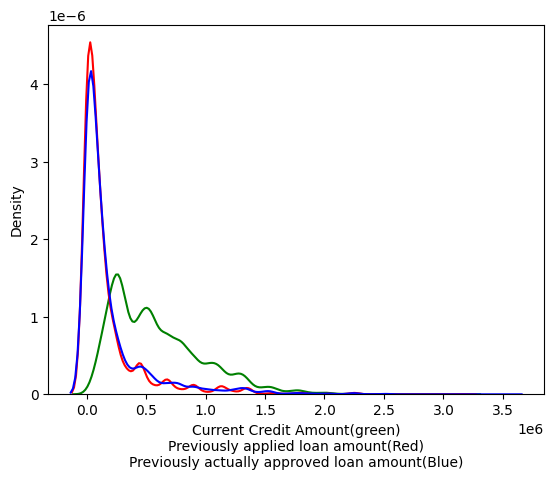

In [267]:
sns.kdeplot(All_Loans.AMT_CREDIT_x, color='Green')
sns.kdeplot(All_Loans.AMT_APPLICATION_previous, color='Red')
sns.kdeplot(All_Loans.AMT_CREDIT_previous, color='blue')
plt.xlabel('Current Credit Amount(green)\nPreviously applied loan amount(Red)\nPreviously actually approved loan amount(Blue)')
plt.show()

- Insights

- Previously more people have applied for less amount loan and out of them some of the loan got disapproved.
- Most of the candidates in the current time applied for loan worth more i.e gretar than 5 Lakhs
